# Cancer Diagnosis in Medical Imaging

### CS 109B/Stat 121B/AC 209B/CSCI 109B: Final Project Glickman, Protopapas.
#### Assigned Teaching Fellow: Brandon Walker
#### Kenneth Chen, Yajaira Gonzalez, Christoph Muus, Matthew Stewart, and Claire Stolz (Group 19)

Presentation link: https://docs.google.com/presentation/d/1BOCjuH6EFjrGZj1cohN3UWx3k3lVh5pvNilwdqg3Uy0/edit?usp=sharing

## Project Background

Our team pursued the development of high-accuracy classifiers with reduced recall rate using deep learning algorithms, as well as boundary box annotation of mammography x-rays. Breast cancer is the second most common cancer in American women (after skin cancer) [18]. Breast cancer is the second most fatal cancer for women as well, second only to lung cancer [19]. In 2015, there were approximately 250,000 new cases of breast cancer in the United States, and over 40,000 women died of breast cancer [17]. While breast cancer has some known genetic factors, most breast cancers (85% of cases) are the result of natural or environmental causes. 

Breast cancer has typically had high public awareness and research funding. However disease prevention, diagnosis, and treatment remain significant problems for the scientific and medical fields. Of central concern is early detection of breast cancer. Doctors in the United States recommend that women over 40 receive a yearly mammogram [20]. Mammograms are thought to provide early detection for cancers and to prevent breast cancer mortalities by treating the cancer before it can metasticize. Some research suggests that screening mammograms decrease breast cancer deaths by 15 to 29 percent in women over 40. However, recent studies have suggested that mammograms suffer from high false positive rates: "One in 10 women undergoing screening mammography are recalled for diagnostic workup, of which fewer than 5 percent will eventually be found to have cancer" [14]. False positives have a number of significant costs. They cause undue stress for patients, result in unneeded tests and treatments, can result in significant costs, and distract doctors from patients with higher priority problems. The mammograms themselves also expose patients to radiation and increase the risk of cancer. 

All together, these finding suggest that mammograms are a promising application for computer vision. Existing data science challenges, including the DREAM challenge by Sage Bionetworks [14], ask researchers to develop tools that can improve computer vision performance specifically for mammograms. In this project, we pursue a number of techniques for identifying cancer or abnormal tissues in mammogram images. 

## Dataset
We use a clean version of the dataset found in Kaggle [11] which utilizes data from the Digital Database for Screening Mammography (DDSM) [12] and CBIS-DDSM [13] datasets. The data has been preprocessed and downsized from 598x598 to 299x299 image resolution, focusing on the region of interest. The dataset contains over 55k training images where ~86% are negative samples and ~14% are positive samples. The data is stored as tfrecords files for TensorFlow.

## Literature Review

The application of machine learning to mammography analysis has been a topic of interest for several decades but has become more prevalent in recent years due to rapid developments in the field of deep learning [5]. Many articles now focus on utilizing deep convolutional neural networks to isolate spatially correlated features in mammograms, specifically, the preponderance of microcalcifications present, to predict whether a given patient has breast cancer [1-9]. Several other novel methods have been introduced in recent years for the same purpose, such as generative adversarial networks to generate mammograms to increase the size of training sets for other algorithms [9], the use of hidden Markov tree models [10] and also random forest classification methods [4].

Deep CNNs have the potential to revolutionize medical image analysis. Ribli et al. proposed a system based on one of the most successful object detection frameworks, Faster R-CNN. The system detects and classifies malignant or benign lesions on a mammogram without any human intervention. The method obtained a classification performance with AUC=0.95 on the public INbreast database. The approach achieved 2nd place in the Digital Mammography DREAM Challenge with AUC = 0.85 [1].

Gertych et al. [15] introduce another promising application of CNNs for cancer identification and treatment. For many cancers, simply identify the presence of a tumor is insufficient for optimal treatment practices. Even within particular cancers, there are variations that manifest in visual differences between tumors. For example, lung cancers can be lepidic, papillary, micropapillary, acinar, cribriform and solid, and the treatment for each type can vary. It’s therefore helpful to be able to identify the type of tumor from an image and annotate the image accurately for physicians’ use. Gertych et al. implement a CNN for lung cancer histological growth patterns in images, and achieve an overall accuracy of 89.24%. 

Another useful resource is Yamashita et al.’s survey of CNNs for radiation imaging classification and annotation  [16]. In particular, they discuss the potential applications of Grad-CAM, an image annotation method that highlights the “discriminative image regions used by the CNN for the classification.” This is a method we may also pursue for our image annotation. 


## Transfer Learning

Transfer learning is a method to generalize learning between tasks. As with human learning, information from one task in machine learning (ML) can have applications to another task. This can include reduced training time, improved performance, increased stability, and a number of other benefits. The most common application of transfer learning in ML has been the use of pre-trained convolutional neural networks (CNNs). As discussed, CNNs have achieved impressive results for image recognition. One of the hallmarks of the CNN structure is the use of filters to identify particular shapes and colors in images [25]. Typically, early layers of deep CNNs identify broad structural elements in images, such as lines or dots. Later layers identify larger components: longer lines, more complicated shapes, connections between different small-scale objects, etc. Then the final layers of the network synthesize these filters to predict the relevant classes. Because most successful CNNs utilize this structure, the filters in the initial layers can be thought of as general feature extractors for all images. 

Transfer learning seeks to use these feature extractors or filters to improve image classification for new datasets and tasks. Concretely, this can be done by adapting a previously trained model, such as VGG or ResNet, to fit a new dataset. Typically two approaches are used:

1. Freeze the weights in the initial layers of the source network but allow the last few layers to update. This keeps the weights from changing when the network is used on a new dataset. The initial filters will remain identical to the source network, while the final layers will change to reflect the new data and task. For example, many popular and high-performing networks are trained on ImageNet, which has over 1 million datapoints and 1000 classes. The target network may need to be adapted to fit the input image size or the number of classes if they do not fit the ImageNet dataset. 
2. Do not freeze any weights. Initialize the target network with pre-trained source network weights and allow all weights to update during training. As with the previous technique, the network may require some adaptation to fit the target data and task.

Transfer learning has a number of benefits. Primarily for applications such as ours, it reduces training time and data requirements. Because medical imaging in particular is prone to small datasets, transfer learning can be very helpful in improving model performance. 

## Approach

We pursued four different models to improve recall:

1. VGG16/VGG19
2. ResNet
3. UNet
4. Transfer learning (using VGG)

We also experimented with Tensor Processing Units to improve performance. 

### VGG16

VGG16 is a convolutional neural network model proposed in 2014 by K. Simonyan and A. Zisserman [22]. It built on the popular AlexNet model by using small 3x3 filters instead of larger 5x5 or 9x9 filters. The reduced filter size allowed the model to have more layers and ultimately this proved effective for image recognition. Where AlexNet could only effectively use 8 layers, VGG16 could use 16. VGG16 performed very well on the ImageNet dataset, achieving a 92.7% top-5 test accuracy. Later, a slightly deeper version of VGG was released. Instead of 16 layers it has 19, and is consequentially called VGG19. Unfortunately both VGG networks suffer from very long training times. 

#### VGG16 Architecture

The VGG16 input is a 224 x 224 RGB image. (We adjust this slightly for our model to use 128x128 single channel images.) The input image is passed through sequential layers of 3x3 filters and 2x2 max pooling layers. The stride for convolutional layers is 1 and max pooling layers is 2. The full structure is below: 

    1. Convolution using 64 filters
    2. Convolution using 64 filters + Max pooling
    3. Convolution using 128 filters
    4. Convolution using 128 filters + Max pooling
    5. Convolution using 256 filters
    6. Convolution using 256 filters
    7. Convolution using 256 filters + Max pooling
    8. Convolution using 512 filters
    9. Convolution using 512 filters
    10. Convolution using 512 filters + Max pooling
    11. Convolution using 512 filters
    12. Convolution using 512 filters
    13. Convolution using 512 filters + Max pooling
    14. Fully connected with 4096 nodes
    15. Fully connected with 4096 nodes
    16. Output layer with Softmax activation with 1000 nodes

Most of the training weights are the weights from the fully connected layers (14 and 15). All of the hidden layers use ReLU for non-linearity, and the final layer uses softmax with 1000 nodes since this model (and the others we discuss) is trained for ImageNet, which has 1000 classes. 

#### VGG19 Architecture

VGG19 architecture is very similar to VGG16 with a few small changes which result in a deeper network: 

    1. Convolution using 64 filters
    2. Convolution using 64 filters + Max pooling
    3. Convolution using 128 filters
    4. Convolution using 128 filters + Max pooling
    5. Convolution using 256 filters
    6. Convolution using 256 filters
    7. Convolution using 256 filters
    8. Convolution using 256 filters + Max pooling
    9. Convolution using 512 filters
    10. Convolution using 512 filters
    12. Convolution using 512 filters
    12. Convolution using 512 filters + Max pooling
    13. Convolution using 512 filters
    14. Convolution using 512 filters
    15. Convolution using 512 filters
    16. Convolution using 512 filters + Max pooling
    17. Fully connected with 4096 nodes
    18. Fully connected with 4096 nodes
    19. Output layer with Softmax activation with 1000 nodes
    
Because VGG16 and VGG19 are such deep networks, they were trained sequentially: the initial layers were trained first as their own stand-alone network. The weights found during pre-training were then loaded into the full model, frozen, and the final layers were trained. As discussed earlier, this makes VGG somewhat unwieldy and slow to train. 
 
### ResNet

The two previously discussed networks, AlexNet and VGG, are both considered "sequential" networks because each layer feeds into the next in sequence. This allows the model to capture more complex features than a shallow network, but makes it very difficult to train due to a huge number of parameters and vanishing gradients. Vanishing gradients occur due to backpropigation of many small gradient values, which when multiplied together become extremely small and difficult to work with. To address these issue, He et al. introduced ResNet, which relies partly on a non-sequential architecture. ResNet has both the typical sequential layer connections, but it also has "skip" connections which allow gradients to backpropigate through a subset of the layers. This eliminates vanishing gradients because some layers can be skipped. Another advantage of ResNet is it ensures that initial layers "learn more" than later layers. We used ResNet50, which is one version of the general ResNet model. The ResNet50 model follows the general structure: five different "stages" made up of different layers:

#### ResNet Architecture
Convolutional block structure:        
    1. 64 1x1 filters
    2. 64 3x3 filters
    3. 256 1x1 filters
        
Identity block:
    2. Batch normalization
    3. ReLU activation
    4. Max pool

The full network stacks convolutional block on identity blocks, with five such stages total. The structure is then:

    1. Stage 1
        1. Convolutional block 1
            1. 64 1x1 filters
            2. 64 3x3 filters
            3. 256 1x1 filters
        2. Identity block 1 
            2. Batch normalization
            3. ReLU activation
            4. Max pool
    2. Stage 2
    3. Stage 3
    4. Stage 4
    5. Stage 5
    6. Average pooling layer
    7. Flatten
    8. Fully connected layer
    9. Output

### U-Net

The last network we explored is U-Net, a convolutional network designed by Olaf Ronneberger, Philipp Fischer, and Thomas Brox and released in 2015 [23]. U-Net was designed specifically with biomedical images in mind, making it the perfect network to use for this project. Ronneberger et al. recognized that one shortcoming of recent CNNs was their output constraints, namely that the networks predicted a class, but that particularly with biomedical imaging, some information about location is helpful as well. Furthermore, its extremely difficult to gather large biomedical image datasets. Ronneberger et al. were not the first researchers to identify this shortcoming: Ciresan et al. had realized this issue and built their own network that addressed the problem [24]. Ciresan et al. designed a network that uses a sliding window setup that predicts the class of a particular pixel while incorporating information from the surrounding pixels. This essentially splits each image into a number of images (addressing the data scarcity issue) while identifying classes of particular areas of the image (addressing localization issue). However, this approach is computationally intensive and has significant redundancy. 

U-Net addresses these issues by supplementing the usual downsampling structure of CNNs with upsampling operators. There are no fully connected layers. For portions of the image without adjacent pixels (border pixels), the authors mirror the pixels on the opposite side to augment the training data. Finally, the U-Net loss function gives a high weight to adjacent mismatched pixel classes, which encourages smoothing of pixel class identification and the identification of regions of interest. 

All hidden layers use a ReLU activation with no padding. The max-pool layers use a stride of 2. For the upsampling portion, the filter halves the number of feature channels and concatenates the correspondingly cropped
feature map from the contracting path. The final 1x1 layer maps each of the 64 output vectors to the correct number of classes, effectively identifying whether or not each pixel has a cancerous region or not. We adjusted the authors' U-Net by replacing the last sigmoid activation funcion with ReLU, flattening the 64 outputs, and outputting one class through a dense layer with sigmoid activation. Rather than asking whether or not each pixel may be cancerous, we are asking whether or not the entire image contains a cancerous region.

#### U-Net Architecture

    1. Downsample
        1. Downsample block 1 [64 channels, output cropped imaged to upsample block 4] 
            1. 64 3x3 filters
            2. 64 3x3 filters
        2. Max pool 2x2
        3. Downsample block 2 [128 channels, output cropped imaged to upsample block 3]
        4. Max pool 2x2 
        5. Downsample block 3 [256 channels, output cropped imaged to upsample block 2]
        6. Max pool 2x2 
        7. Downsample block 3 [512 channels, output cropped imaged to upsample block 1]
        8. Max pool 2x2 
        9. Downsample block 3 [1024 channels]
    
    1. Upsample
        1. Upsample block 1
            1. 1024 3x3 filters
            2. 512 3x3 filters
        2. Up-conv 2x2
        3. Upsample block 2 
            1. 512 3x3 filters
            2. 256 3x3 filters
        4. Up-conv 2x2
        5. Upsample block 3 
            1. 256 3x3 filters
            2. 128 3x3 filters
        6. Up-conv 2x2 
        7. Upsample block 4 
            1. 128 3x3 filters
            2. 64 3x3 filters
            3. 64 3x3 filters
        8. 1x1 layer
        
        
### Transfer learning using VGG

Finally, we explored if we could use transfer learning with VGG to improve performance. We tried freezing weights in the initial layers and retraining the final layers, as well as initializing all weight values and retraining the full network. 

# Imports

In [2]:
#general libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from skimage.transform import resize
import os
import umap

#keras imports
from keras.utils import plot_model
from keras import regularizers
from keras.models import Sequential,Input,model_from_json
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D,Input, BatchNormalization,Input, GlobalAveragePooling2D, Dense
from keras.layers.convolutional import Conv2D 
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import multi_gpu_model
from keras import layers
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import tensorflow as tf
import skimage

def clear_ax(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom=False, left=False, top=False, right=False)
    #ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])

sns.set_style('ticks')


Using TensorFlow backend.


## EDA

We first performed exploratory data analysis to better understand our dataset and identify any possible abnormalities or concerns.We first just downloaded the test data provided on kaggle and merged the files as instructed in the description.

In [3]:
test_data = np.load('test_data.npy')
print(test_data.shape)
test_data = test_data.reshape(-1,299,299,1)
print(test_data.shape)

(15364, 299, 299)
(15364, 299, 299, 1)


In [4]:
cat_names = {0:'negative',
             1:'benign calcification',
             2:'benign mass',
             3: 'malignant calcificaiton',
             4: 'malignant mass'}

In [6]:
test_labels = np.load('test_labels.npy')
test_labels.shape
unique, counts = np.unique(test_labels, return_counts=True)

[print('category {0} (={1}): {2} counts'.format(cat,cat_names[cat], count)) for cat, count in zip(unique, counts)];

category 0 (=negative): 13360 counts
category 1 (=benign calcification): 558 counts
category 2 (=benign mass): 642 counts
category 3 (=malignant calcificaiton): 369 counts
category 4 (=malignant mass): 435 counts


## Example classes

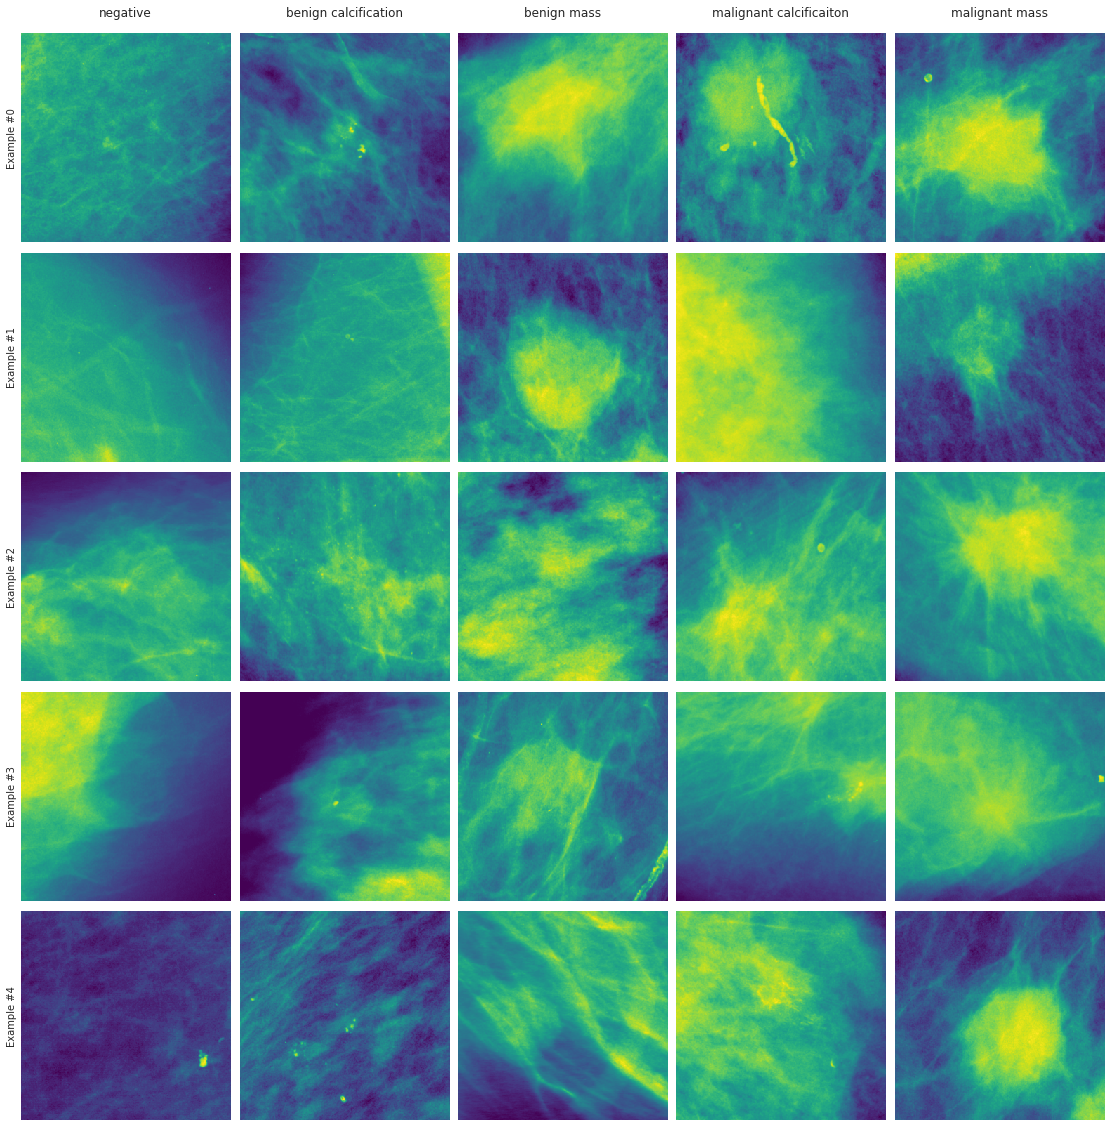

In [11]:
fig,ax = plt.subplots(ncols=5,nrows=5,figsize=(20,20))
for j in range(5):
    cat_imgs = test_data[test_labels==j,:,:,0]
    for i in range(5):
        rand_i = np.random.randint(0,cat_imgs.shape[0])
        ax[i,j].matshow(cat_imgs[rand_i],cmap='viridis')     
        clear_ax(ax[i,j])
        if i == 0:
            ax[i,j].set_title(cat_names[j])
        if j == 0:
            ax[i,j].set_ylabel('Example #{}'.format(i))
            
plt.subplots_adjust(wspace=-0.1, hspace=0.05)

## Histograms
It looks like the images from different categories vary in intensity, we will look at histograms to confirm:

Text(0, 0.5, 'Frequency')

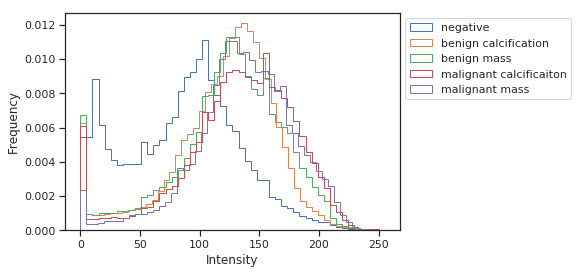

In [175]:
fig,ax = plt.subplots()
for i in range(5):
    ax.hist(test_data[test_labels==i,:,:,1].ravel(),
            bins=50,
            histtype='step',
            density =True,
            color='C'+str(i),
            label=cat_names[i]);
ax.legend(bbox_to_anchor=[1,1])
ax.set_xlabel('Intensity');
ax.set_ylabel('Frequency');

The negative category is slightly dimmer on average. At this point it is unclear, why exactly this might be the case. In the examples  images shown above, it looks like some images from the negative class didn't contain much signal in most of the image.

# Imports

In [ ]:
#general libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
import umap

#keras imports
import keras
from keras.models import load_model
from keras.utils import plot_model
from keras import regularizers
from keras.models import Sequential,Input,model_from_json
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D,Input, BatchNormalization,Input, GlobalAveragePooling2D, Dense
from keras.layers.convolutional import Conv2D 
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import multi_gpu_model

def clear_ax(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom=False, left=False, top=False, right=False)
    #ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])

sns.set_style('ticks')

## Explore Transfer Learning

We then used state-of-the-art pretrained convolutional neural nets and removed the last Dense layer. We then made predictions on the image data, retrieved the output of the last layer and observed how well the different categories separate in PCA space by computing the first 100 PCs and UMAP dimensionality reduction

In [ ]:
from keras.applications.vgg16  import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet201
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2

from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [3]:
models = {'VGG16':VGG16,
          'VGG19':VGG19,
          'DenseNet201':DenseNet201,
          'MobileNetV2':MobileNetV2,
          'ResNet50':ResNet50,
          'Xception':Xception,
          'InceptionV3': InceptionV3,
          'InceptionResNetV2': InceptionResNetV2}

In [ ]:
#augment test data to 3 channels as this is what all these models expect.
test_data_aug = np.concatenate([test_data]*3, axis=3)

In [12]:
predict = {}
for name,_model in models.items():
    print(name)

    input_tensor = Input(shape=(299, 299, 3)) 
    print('load model')
    base_model[name] = _model(input_tensor=input_tensor, weights='imagenet', include_top=False)
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    model = Model(inputs=base_model.input,outputs=x)
    gpu_model = multi_gpu_model(model,gpus=2)
    print('start training')
    #gpu_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    predict[name] = gpu_model.predict(cv10_data,verbose=1)

MobileNetV2
load model
start training
7682/7682 [==============================] - 37s 5ms/step
InceptionV3
load model
start training
7682/7682 [==============================] - 51s 7ms/step
DenseNet201
load model
start training
7682/7682 [==============================] - 95s 12ms/step
VGG19
load model
start training
7682/7682 [==============================] - 58s 8ms/step
ResNet50
load model


/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


start training
7682/7682 [==============================] - 73s 10ms/step
InceptionResNetV2
load model
219062272/219055592 [==============================] - 26s 0us/step
start training
7682/7682 [==============================] - 126s 16ms/step
Xception
load model
start training
7682/7682 [==============================] - 107s 14ms/step
VGG16
load model
start training
7682/7682 [==============================] - 71s 9ms/step


In [ ]:
fig,ax = plt.subplots(nrows=4,ncols=2)
ax = ax.flatten()
embedding= {}
pcs = {}
for i,(name,this_pred) in enumerate(incept_out.items()):
    pca = PCA(n_components=100).fit(this_pred)
    pcs[name] = pca.transform(this_pred)

    umap_gen = umap.UMAP(
        n_neighbors=5,
        n_components=2,
        metric='euclidean',
        init='random')

    embedding[name] = umap_gen.fit_transform(pcs[name])

# Visualize

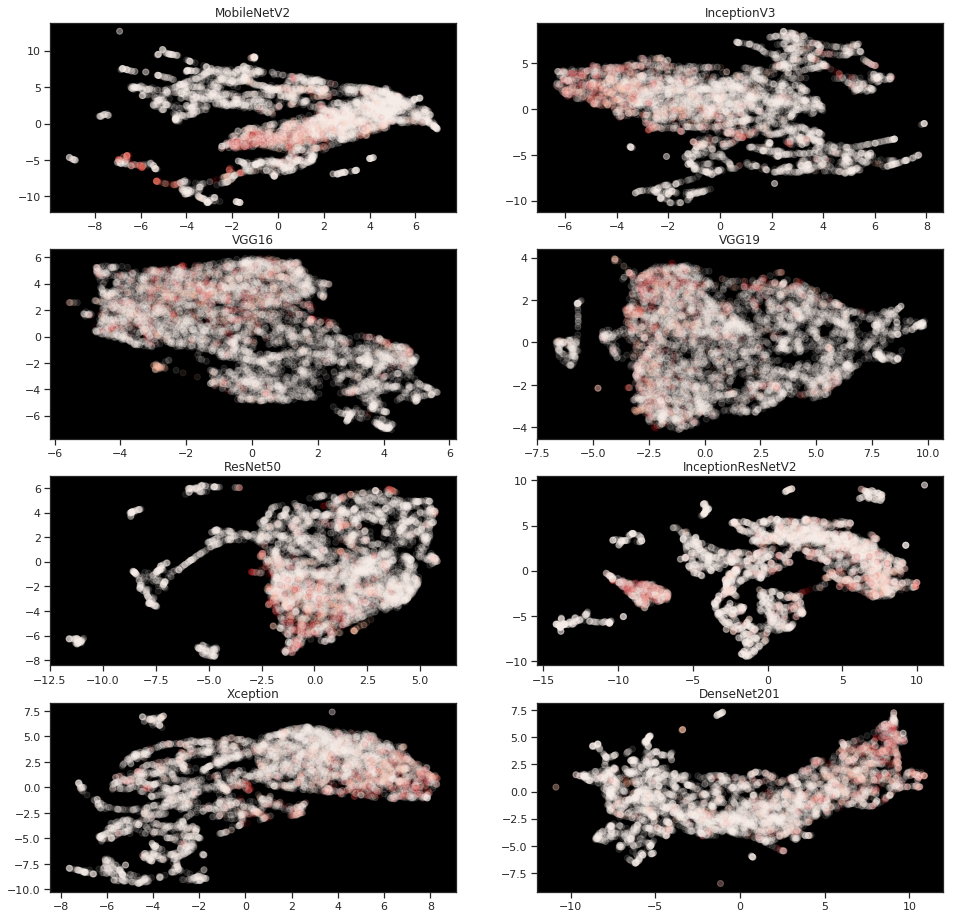

In [16]:
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(16,16))
ax=ax.flatten()
for i,(name,this_pred) in enumerate(incept_out.items()):
    sns.set_style('ticks')
    ax[i].scatter(embedding[name].T[0],embedding[name].T[1],c=cv10_labels,alpha=0.1,cmap='Reds')
    ax[i].set_facecolor('black')
    ax[i].set_title(name)

Out of curiosity, we concatenated the outputs of the two networks that subjectively looked like they resulted in best 
separation of the data. X and Y coordinates correspond to UMAP component 1 and 2.

In [27]:
concat_pred = np.concatenate([incept_out['MobileNetV2'] ,  incept_out['InceptionResNetV2']], axis=1)

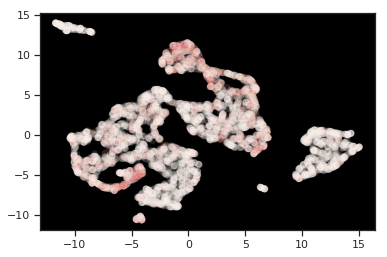

In [29]:
pca = PCA(n_components=2).fit(concat_pred )
pcs = pca.transform(concat_pred)

umap_gen = umap.UMAP(
    n_neighbors=20,
    n_components=2,
    metric='euclidean',
    init='random')

embedding = umap_gen.fit_transform(pcs)

sns.set_style('ticks')
fig,ax = plt.subplots()

ax.scatter(embedding.T[0],embedding.T[1],c=cv10_labels,alpha=0.1,cmap='Reds')
ax.set_facecolor('black')

We can see that this did not nessecarily improve the separation. Visually it seems that Mobile-Net is still resulting in the best separation.

Next we will just make sure that we could potentially retrain these models. The data used here is of course to small to actually do this which is why we will not run the full training.

In [39]:
weights = 1/to_categorical(cv10_labels).sum(axis=0)

In [ ]:
from keras.utils import to_categorical
gpu_model.fit(cv10_data,
              to_categorical(cv10_labels),
              validation_split = 0.1,
              epochs = 10,
              verbose = 1,
              batch_size = 64, class_weight=weights)

( KeyboardInterrupt, not an error )

# Load full dataset

We chose to use the tfrecords dataset from Kaggle. After researching tfrecords, we realized that this comes with the difficulty to handle this file format and that training and testing Keras models using data from tfrecords files wasn't trivial. We first made sure that the tfrecords files were accessible and structured as expected by using code from kaggle: https://www.kaggle.com/skooch/sample-images

### Background on TFRecords

Our project also used Tensorflow records, or TFRecords, which are Tensorflows native binary storage format. TFRecords have a number of advantages, mainly that they use minimal disk storage and thus are easy to work with when using large datasets. TFRecords are also optimized for use with Tensorflow because they are easy to merge and preprocess, which is helpful when loading data in batches. To use TFRecords, data must be written using tf.train.Example or tf.train.SequenceExample, serialize the structures and write to disk using tf.python_io.TFRecordWriter. To load TFRecords one must use the tf.TFRecordReader and define the expected features (based on the structure specified in the writing step). Data must have the same structure to be used with tf.train.SequenceExample (as is the case with our data). 

In [197]:
K.clear_session()

## copied from https://www.kaggle.com/skooch/sample-images
def read_and_decode_single_example(filenames):
    filename_queue = tf.train.string_input_producer(filenames)
    
    reader = tf.TFRecordReader()
    
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(
        serialized_example,
        features={
            'label_normal': tf.FixedLenFeature([], tf.int64),
            'image': tf.FixedLenFeature([], tf.string)
        })
    
    # now return the converted data
    label = features['label_normal']
    image = tf.decode_raw(features['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])
    
    return label, image

In [198]:
label, image = read_and_decode_single_example(["./input/training10_0.tfrecords", "./input/training10_1.tfrecords"])
images_batch, labels_batch = tf.train.batch([image, label], batch_size=16, capacity=2000)
global_step = tf.Variable(0, trainable=False)

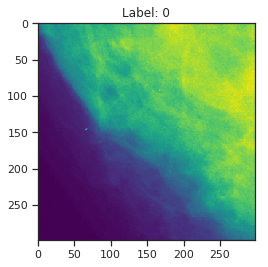

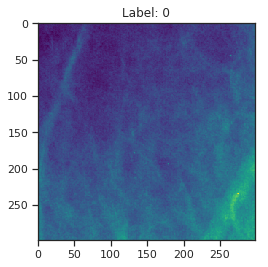

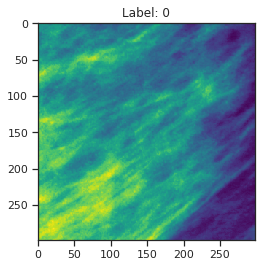

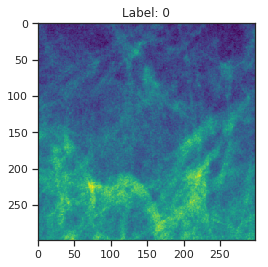

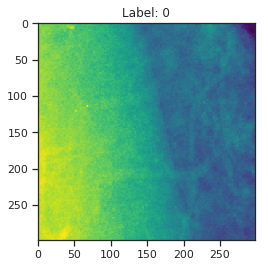

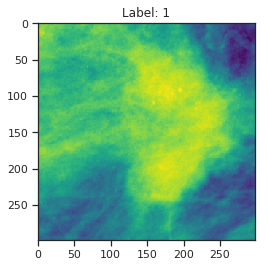

In [201]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for j in range(3):
        la_b, im_b = sess.run([labels_batch, images_batch])
        
        for i in range(2):
            plt.imshow(im_b[i].reshape([299,299]),cmap='viridis')
            plt.title("Label: " + str(la_b[i]))
            plt.show()
            
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)

This confirms we have access to the tfrecords file. Now we set up the code to train a keras model:

# Train keras models using tfrecords

Next we adapted the code from https://keras.io/examples/mnist_tfrecord/ to train a simple convolutional network. Our goal for now was to just show that we have established the neccesary infrastructure.

In [210]:
K.clear_session()
import numpy as np
import os
import tensorflow as tf
import keras
from keras import backend as K
from keras import layers
from keras.callbacks import Callback

from tensorflow.contrib.learn.python.learn.datasets import mnist

if K.backend() != 'tensorflow':
    raise RuntimeError('This example can only run with the '
                       'TensorFlow backend, '
                       'because it requires TFRecords, which '
                       'are not supported on other platforms.')


class EvaluateInputTensor(Callback):
    """ Validate a model which does not expect external numpy data during training.

    Keras does not expect external numpy data at training time, and thus cannot
    accept numpy arrays for validation when all of a Keras Model's
    `Input(input_tensor)` layers are provided an  `input_tensor` parameter,
    and the call to `Model.compile(target_tensors)` defines all `target_tensors`.
    Instead, create a second model for validation which is also configured
    with input tensors and add it to the `EvaluateInputTensor` callback
    to perform validation.

    It is recommended that this callback be the first in the list of callbacks
    because it defines the validation variables required by many other callbacks,
    and Callbacks are made in order.

    # Arguments
        model: Keras model on which to call model.evaluate().
        steps: Integer or `None`.
            Total number of steps (batches of samples)
            before declaring the evaluation round finished.
            Ignored with the default value of `None`.
    """

    def __init__(self, model, steps, metrics_prefix='val', verbose=1):
        # parameter of callbacks passed during initialization
        # pass evalation mode directly
        super(EvaluateInputTensor, self).__init__()
        self.val_model = model
        self.num_steps = steps
        self.verbose = verbose
        self.metrics_prefix = metrics_prefix

    def on_epoch_end(self, epoch, logs={}):
        self.val_model.set_weights(self.model.get_weights())
        results = self.val_model.evaluate(None, None, steps=int(self.num_steps),
                                          verbose=self.verbose)
        metrics_str = '\n'
        for result, name in zip(results, self.val_model.metrics_names):
            metric_name = self.metrics_prefix + '_' + name
            logs[metric_name] = result
            if self.verbose > 0:
                metrics_str = metrics_str + metric_name + ': ' + str(result) + ' '

        if self.verbose > 0:
            print(metrics_str)


def cnn_layers(_input):
    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(_input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    _out = layers.Dense(num_classes,
                               activation='softmax',
                               name='x_train_out')(x)
    return _out

sess = K.get_session()

batch_size = 64
batch_shape = (batch_size, 299, 299, 1)
epochs = 5
num_classes = 5

# The capacity variable controls the maximum queue size
# allowed when prefetching data for training.
capacity = 10000

# min_after_dequeue is the minimum number elements in the queue
# after a dequeue, which ensures sufficient mixing of elements.
min_after_dequeue = 3000

# If `enqueue_many` is `False`, `tensors` is assumed to represent a
# single example.  An input tensor with shape `[x, y, z]` will be output
# as a tensor with shape `[batch_size, x, y, z]`.
#
# If `enqueue_many` is `True`, `tensors` is assumed to represent a
# batch of examples, where the first dimension is indexed by example,
# and all members of `tensors` should have the same size in the
# first dimension.  If an input tensor has shape `[*, x, y, z]`, the
# output will have shape `[batch_size, x, y, z]`.
enqueue_many = True

label, image = read_and_decode_single_example(["./input/training10_0.tfrecords", "./input/training10_1.tfrecords"])
x_train_batch, y_train_batch = tf.train.batch([image, label],  batch_size=batch_size, capacity=capacity,)


x_train_batch = tf.cast(x_train_batch, tf.float32)
x_train_batch = tf.reshape(x_train_batch, shape=batch_shape)

y_train_batch = tf.cast(y_train_batch, tf.int32)
y_train_batch = tf.one_hot(y_train_batch, num_classes)

x_batch_shape = x_train_batch.get_shape().as_list()
y_batch_shape = y_train_batch.get_shape().as_list()

model_input = layers.Input(tensor=x_train_batch)
model_output = cnn_layers(model_input)
train_model = keras.models.Model(inputs=model_input, outputs=model_output)

# Pass the target tensor `y_train_batch` to `compile`
# via the `target_tensors` keyword argument:
train_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'],
                    target_tensors=[y_train_batch])
train_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (64, 299, 299, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (64, 297, 297, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (64, 148, 148, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (64, 146, 146, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (64, 73, 73, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (64, 341056)              0         
_________________________________________________________________
dense_1 (Dense)              (64, 512)                 174621184 
__________

In [211]:
print(x_train_batch.shape)

(64, 299, 299, 1)


In [212]:
## Setup data

label, image = read_and_decode_single_example(["./input/training10_2.tfrecords"])
x_test_batch, y_test_batch = tf.train.batch([image, label],  batch_size=batch_size, capacity=capacity,)

#Create a separate test model
#to perform validation during training
x_test_batch = tf.cast(x_test_batch, tf.float32)
print(x_test_batch,batch_shape)
x_test_batch = tf.reshape(x_test_batch, shape=batch_shape)

y_test_batch = tf.cast(y_test_batch, tf.int32)
y_test_batch = tf.one_hot(y_test_batch, num_classes)

x_test_batch_shape = x_test_batch.get_shape().as_list()
y_test_batch_shape = y_test_batch.get_shape().as_list()


test_model_input = layers.Input(tensor=x_test_batch)
test_model_output = cnn_layers(test_model_input)
test_model = Model(inputs=test_model_input, outputs=test_model_output)

# Pass the target tensor `y_test_batch` to `compile`
# via the `target_tensors` keyword argument:
test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'],
                   target_tensors=[y_test_batch])
test_model.summary()

Tensor("Cast_2:0", shape=(64, 299, 299, 1), dtype=float32) (64, 299, 299, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (64, 299, 299, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (64, 297, 297, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (64, 148, 148, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (64, 146, 146, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (64, 73, 73, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (64, 341056)              0         
_________________________________________________________________

Them model comiples well and the data is read in properly

In [213]:
train_model.save_weights('saved_wt.h5')

In [206]:
# Fit the model using data from the TFRecord data tensors.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess, coord)

train_model.fit(
    epochs=1,
    steps_per_epoch=2,
    callbacks=[EvaluateInputTensor(test_model, steps=100)])

Epoch 1/1
100/100 [==============================] - 27s 266ms/step

val_loss: 2.0651309821009636 val_acc: 0.871875 


# Transfer weights to test_model and evaluate performance on test set.

The purpose of the Mnist tfrecord article is to establish a model that can first be trained with tfrecords and later be tested with data in more traditional numpy arrays. Next we will establish that we succeeded in adopting the code such that we can run the model on the provided test data.

In [207]:
# Save the model weights.
train_model.save_weights('saved_wt.h5')

In [208]:
# Clean up the TF session.
coord.request_stop()
coord.join(threads)
K.clear_session()

# Second Session to test loading trained model without tensors
x_test = test_data[:,:,:,1]
x_test = x_test.reshape(-1,299,299,1)
y_test = test_labels

x_test_inp = layers.Input(shape=(x_test.shape[1:]))
test_out = cnn_layers(x_test_inp)

test_model = keras.models.Model(inputs=x_test_inp, outputs=test_out)
test_model.load_weights('saved_wt.h5')
test_model.summary()
test_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

loss, acc = test_model.evaluate(x_test,
                                keras.utils.to_categorical(y_test),
                                batch_size=batch_size)
print('\nTest accuracy: {0}'.format(acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 299, 299, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 297, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               174621184 
__________

# Training on Full Data

## Helper function to read tfrecords

In [2]:
def read_tfrecord(serialized_example):
    '''takes a serialized entry, parses it, 
    and decodes the image into a numpy array'''
    # adapted from https://www.kaggle.com/skooch/ddsm-mammography
    features = tf.parse_single_example(
      serialized_example,
      features={'label': tf.FixedLenFeature([], tf.int64),
                'image': tf.FixedLenFeature([], tf.string)})

    label = features['label']
    image = tf.decode_raw(features['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])
    
    return label,image

## Helper function to read in training data

In [3]:
import tqdm
def get_train_data(_tf_records_filenames,
                   train_size=0.9,
                   resize_shape=(128,128,1)):
    
    '''load data from tfrecords into numpy array
       INPUT: list of tfrecords filenames
       OUTOUT: split of the data in numpy arrays
    '''
    
    _dataset = tf.data.TFRecordDataset(_tf_records_filenames
                                      ).map(read_tfrecord)
    _iterator = _dataset.make_one_shot_iterator()
    _label_it,_image_it = _iterator.get_next()
    
    labels = []
    images = []
    with tf.Session() as sess:
        print('start')
        for i in tqdm.tqdm(range(60000)):
            try:
                _lbl,_im = sess.run((_label_it,_image_it))
                # we now resize
                _im = skimage.transform.resize(_im,resize_shape, anti_aliasing=True)
                _im = np.array(_im)
                images.append(_im)
                labels.append(_lbl)
                
            except:
                print('no more records.')
                print('total read records ', i)
                break

    labels = np.asarray(labels)
    images = np.asarray(images)

    X_train, X_val, y_train, y_val =  train_test_split(images,labels,
                                                       shuffle=True,
                                                       train_size=train_size,
                                                       stratify=labels)
    del images,labels
    return X_train, X_val, y_train, y_val

## Helper function to read in test data

In [4]:
def get_test_data(test_data_filename, test_labels_filename, resize_shape=(128,128,1)):
    
    X_data= np.load("./test_data/"+test_data_filename)
    y_data = np.load("./test_data/"+test_labels_filename)

    #Expand dimensions so that one image is a 3 tuple representation (width, height, channel)
    #X_data = np.expand_dims(X_data, axis=3) 
    
    #resize images one by one
    X_data_resized =[]
    for i in range(0, X_data.shape[0]):
        image= skimage.transform.resize(X_data[i],resize_shape, anti_aliasing=True)
        X_data_resized.append(image)
    X_data = np.asarray(X_data_resized)
    
    del X_data_resized #delete temporary storage
    return X_data, y_data

## Helper functions  to store and load model 

In [5]:
# Store model
def store_keras_model(model, model_name):
    model_json = model.to_json() # serialize model to JSON
    with open("./{}.json".format(model_name), "w") as json_file:
        json_file.write(model_json)
    model.save_weights("./{}.h5".format(model_name)) # serialize weights to HDF5
    print("Saved model to disk")
    
# Load model 
def load_keras_model(model_name):
    # Load json and create model
    json_file = open('./{}.json'.format(model_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # Load weights into new model
    model.load_weights("./{}.h5".format(model_name))
    return model

## Plot function for loss and accuracy of a model

In [6]:
# Plot history
def plot_training_history(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc= history.history['val_acc']        
 
    epochs = range(1,len(loss)+1)
    
    fix, ax = plt.subplots(2,1,figsize=(10,6))
        
    #plot loss
    ax[0].plot(epochs, loss, label='Train_loss')
    ax[0].plot(epochs, val_loss, label='Val_loss')
    ax[0].set_title('Training and validation loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    #plot acc
    ax[1].plot(epochs, acc, label='Train_acc')
    ax[1].plot(epochs, val_acc, label='Val_acc')
    ax[1].set_title('Training and validation Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    
    ax[0].legend()
    ax[1].legend()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1) 
    plt.show()                       

## Metrics of the Confussion Matrix (Recall, Precision, Specificity and False Positive Rate)

In [7]:
#https://classeval.wordpress.com/introduction/basic-evaluation-measures/
def get_confusion_meassures(y_test,y_pred) :
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    #Precision (Positive predictive value)
    prec = tp/(tp+fp)
    
    #Sensitivity (Recall or True positive rate)
    recall = tp/(tp+fn)
    
    #Specificity (True negative rate)
    sp = tn/(tn+fp)
    
    #False positive rate
    fpr = fp/(tn+fp)

    return prec,recall, sp,fpr

## ResNet building blocks

In [8]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), use_bias=False, padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), use_bias=False,padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), use_bias=False,padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X


In [9]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    #X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', use_bias=False,kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), use_bias=False,padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), use_bias=False,padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), use_bias=False,padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [10]:
#ResNet 50 taken from : ,(6 classes, 3 channels)
#https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

def ResNet50(input_shape=(64, 64,3), classes=1):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), use_bias=False,name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    #X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Dense(classes, activation='sigmoid', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

## Model definition VGG16

In [11]:
def VGG16(input_shape = (256, 256,1), classes = 1,dropout=0.4) :
    
    _in = Input(shape=input_shape)
    
    x = _in
    
    for nfilters in [64,128]:
        for _ in range(2):
            x = ZeroPadding2D((1,1))(x)
            x = Conv2D(nfilters, (3, 3),kernel_initializer='he_normal')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        x = MaxPooling2D()(x)

    for nfilters in [256,512,512]:
        for _ in range(3):
            x = ZeroPadding2D((1,1))(x)
            x = Conv2D(nfilters, (3, 3),kernel_initializer='he_normal')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        x = MaxPooling2D()(x)

    x = Flatten()(x)
    x = Dense(16,kernel_initializer='he_normal',
              use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    
    if classes == 1:
        _out = Dense(classes,activation ='sigmoid')(x)
    if classes > 1:
        _out = Dense(classes,activation = 'softmax')(x)
    
    model = Model([_in],[_out])
    return model

In [12]:
from keras.layers import *
from keras.optimizers import *
import keras_metrics as km

dim = 128 #256
def unet(pretrained_weights = None,input_shape= (dim,dim,1)):
    inputs_ = Input(input_shape)
    
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs_)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
#     conv4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
#     conv5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)    
    merge6 = concatenate([conv4,up6], axis = 3)
    merge6 = BatchNormalization()(merge6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)   
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)   
    
    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)  
    merge7 = concatenate([conv3,up7], axis = 3)
    merge7 = BatchNormalization()(merge7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)  
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)  

    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)  
    merge8 = concatenate([conv2,up8], axis = 3)
    merge8 = BatchNormalization()(merge8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)  
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)  

    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)  
    merge9 = concatenate([conv1,up9], axis = 3)
    merge9 = BatchNormalization()(merge9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9) 
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9) 
    
    conv10 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv10) # normally unet stops right here and assigns each pixel 0 or 1
    flattened = Flatten()(conv10)
    final = Dense(1, activation='sigmoid')(flattened)

    model = Model(inputs = inputs_, outputs = final)

    model.compile(optimizer = SGD(lr = 1e-6), loss = 'binary_crossentropy', metrics=['accuracy',km.f1_score()])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

## Load train data

In [13]:
tf_records_filenames = ["./training_data/training10_0.tfrecords",
                        "./training_data/training10_1.tfrecords",
                        "./training_data/training10_2.tfrecords",
                        "./training_data/training10_3.tfrecords",
                        "./training_data/training10_4.tfrecords"]

X_train, X_val, y_train, y_val = get_train_data(tf_records_filenames)

  0%|          | 0/60000 [00:00<?, ?it/s]

start


 93%|█████████▎| 55870/60000 [02:36<00:11, 361.05it/s]

no more records.
total read records  55885


/home/muus/.conda/envs/tf_gpu/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Load test data

In [14]:
X_test, y_test = get_test_data('test_data.npy','test_labels.npy')

 93%|█████████▎| 55870/60000 [02:50<00:11, 361.05it/s]

# Check data

As good practise we will check all our data just before training the model to make sure all data 
is on the same scale and the right shape

In [18]:
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("Y_val shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

X_train shape: (50296, 128, 128, 1)
Y_train shape: (50296,)
X_val shape: (5589, 128, 128, 1)
Y_val shape: (5589,)
X_test shape: (15364, 128, 128, 1)
Y_test shape: (15364,)


## plot a few train example images:

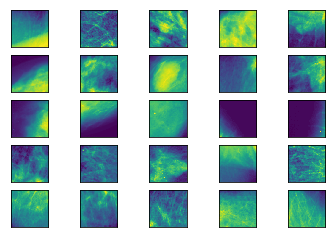

In [16]:
fig,ax = plt.subplots(nrows=5,ncols=5)
ax = ax.flatten()
for i in range(25):
    ax[i].imshow(X_train[i,:,:,0])
    ax[i].set_yticks([])
    ax[i].set_xticks([])

## plot a few test example images:

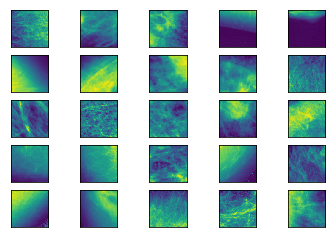

In [17]:
fig,ax = plt.subplots(nrows=5,ncols=5)
ax = ax.flatten()
for i in range(25):
    ax[i].imshow(X_test[i,:,:,0])
    ax[i].set_yticks([])
    ax[i].set_xticks([])

## plot histograms to qualitatively check distributions

We are plotting the distributions of pixel values in train, test and validation data

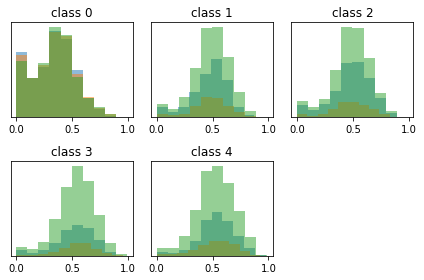

In [24]:
fig,ax = plt.subplots(nrows=2,ncols=3)
ax = ax.flatten()
for i in range(5):
    ax[i].hist(X_test[y_test==i][0:1000].flatten(),alpha=0.5,label='test')
    ax[i].hist(X_val[y_val==i][0:1000].flatten(),alpha=0.5,label='validation')
    ax[i].hist(X_train[y_train==i][0:1000].flatten(),alpha=0.5,label='train')
    ax[i].set_yticks([])
    ax[i].set_title('class '+str(i))
ax[5].remove()
plt.tight_layout()


## Train models

## Build and Train models

to get an impression how long it takes to train one epoch for the different models we are using a callback, which is called before and after every epoch to start and stop a timer and record the time.

In [45]:
class TimeHistory(keras.callbacks.Callback):
    # copied from https://stackoverflow.com/questions/43178668/
    # record-the-computation-time-for-each-epoch-in-keras-during-model-fit
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

Initializing hyperparameters, this was changed for training different models, all trained models were saved.
The respective hyperparameters were saved in the filenames.

In [25]:
EPOCHS = 20
BATCH_SIZE = 64
DIM = 128
CATEG = 2
input_shape = (DIM,DIM,1)
models = {'VGG16': VGG16(input_shape = input_shape, classes = 1),
          'RESNET': ResNet50(input_shape = input_shape, classes=1)}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


We will binarize the labels according to the CATEG parameters: > CATEG 0 would mean we compare healthy tissue with tissue that might have any sign of a leason. > CATEG 2, which is the condition we chose will binarize labels into 0 for non-malignant classes and 1 for malignant classes.

In [26]:
print("Positive values in train: ", round(sum(y_train>CATEG)/len(y_train>CATEG)*100,2),"%")
print("Positive values in validation: ", round(sum(y_val>CATEG)/len(y_val>CATEG)*100,2),"%")
print("Positive values in test: ", round(sum(y_test>CATEG)/len(y_test>CATEG)*100,2),"%")

Positive values in train:  5.86 %
Positive values in validation:  5.85 %
Positive values in test:  5.23 %


We observe there is a slight imbalance between test and train set. We also note the large imbalance of classes, which is why we will have tiem weight the binary corssentropy loss by class frequencies.

In [27]:
counts = np.unique(y_train>CATEG, return_counts=True)[1]
class_weights = 1/(counts / counts.sum())
print(class_weights)

[ 1.0622624  17.06105834]


We store the models that are to be trained in a dictionary such that we can easily loop through the models and save them according to their name and hyperparameters:

# Training VGG16 and ResNet


For VGG16 we started using adam as an optimizer, then tried SGD with a slow learning rate. SGD seemed to work as well, which is why we went forward with SGD. For the initial settings we just trained for 200 epochs to get an impression how well the performance could get. Next we tried to achieve the same in fewer epochs by changing the regularization (removed Dropout) adding momentum and learning rate decay. 

In [ ]:
K.clear_session()

models = {'VGG16': VGG16(input_shape = input_shape, classes = 1),
          'RESNET': ResNet50(input_shape = input_shape, classes=1)}

from keras.optimizers import SGD 

for model_name,model in models.items():
    print(model_name)
    
    if model_name == 'VGG16':
        lr = 1e-5
        
    if model_name =='RESNET':
        lr = 1e-6
        
    opt = SGD(lr=lr,momentum=0.9,decay=lr/EPOCHS)

    time_callback = TimeHistory()
    
    name = '{0}-epochs-{1}_batchsize-{2}_dim-{3}_categ-{4}_SGD-{5}_decay'
    
    model_name = name.format(model_name,
                             EPOCHS,
                             BATCH_SIZE,
                             DIM,
                             CATEG,
                             lr)   
        
    model.compile(optimizer = opt,
                  loss      = 'binary_crossentropy',
                  metrics   = ['accuracy',km.f1_score()])

    model_history = model.fit(X_train, 
                              (y_train > CATEG), 
                              epochs          = EPOCHS, 
                              class_weight    = class_weights,
                              batch_size      = BATCH_SIZE,
                              callbacks       = [time_callback],
                              validation_data = (X_val,
                                                 (y_val>CATEG)))

    model.save('./trained_models/'+model_name+'_model.h5')

    pickle.dump(model_history.history,
                open('./trained_models/'+model_name+
                     '_history.pickle','wb'))

    pickle.dump(time_callback.times,
                open('./trained_models/'+model_name+
                     '_times.pickle','wb'))

Next, we load all models and compute metrics on the predictions

In [41]:
K.clear_session()

times = {}
history = {}
acc = {}
predict = {}
EPOCHS = 20

names = {'RESNET_1': "RESNET-epochs-20_batchsize-64_dim-128_categ-2_SGD-1e-06",
         'VGG16_3': 'VGG16-epochs-20_batchsize-64_dim-128_categ-2_SGD-1e-06_decay_classweights1_25'}

for model_name,model_file in names.items():
    print(model_name)
    model = load_model('./trained_models/'+model_file+'_model.h5',
                      custom_objects={'binary_f1_score':km.f1_score()})
    
    # we can't just load all models into memory which is why we need to
    # make predictions and then overwrite the model.
    predict[model_name] = model.predict(X_test,verbose=1)
    history[model_name] = pickle.load(open('./trained_models/'+ 
                     model_file +'_history.pickle','rb'))
    times[model_name] = pickle.load(open('./trained_models/'+ 
                     model_file +'_times.pickle','rb'))

RESNET_1
15364/15364 [==============================] - 9s 557us/step
VGG16_3
15364/15364 [==============================] - 11s 716us/step


In [36]:
pickle.dump(history, open('./trained_models/history_all','wb'))
pickle.dump(predict, open('./trained_models/history_all','wb'))
pickle.dump(times, open('./trained_models/history_all','wb'))

Text(0.5, 1.08, 'malignant(1) vs. rest(0)')

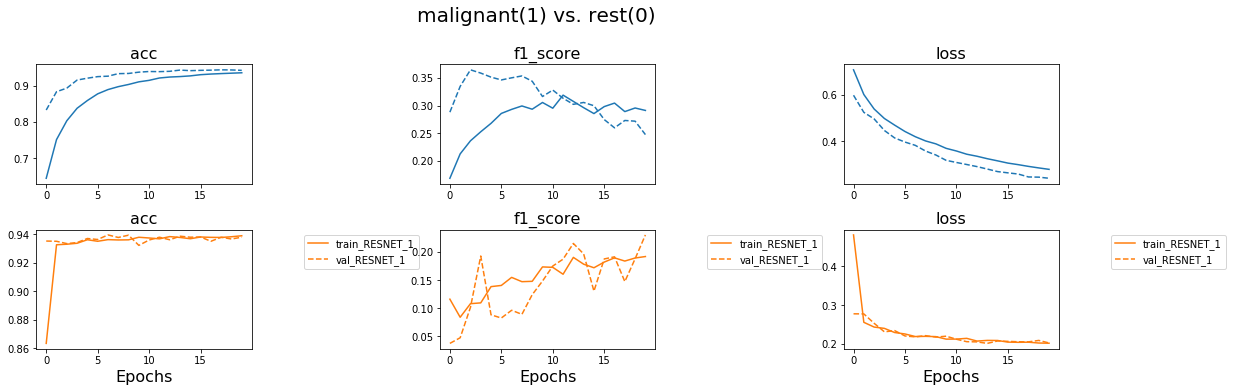

In [38]:
title = {2: 'malignant(1) vs. rest(0)'}

fig,ax = plt.subplots(ncols=3, nrows=2,figsize=(15,5))
for k,metric in enumerate(['acc','f1_score','loss']):
    for i,model_name_ in enumerate(['VGG16_4','RESNET_1']):
        
        ax[i,k].plot(history[model_name_ ][metric],c='C'+str(i),
              ls='-',label ='train_{0}'.format(model_name_) )
        ax[i,k].plot(history[model_name_ ]['val_'+metric],c='C'+str(i),
              ls='--',label = 'val_{0}'.format(model_name_) )
        ax[i,k].set_title(metric,size=16)
        plt.tight_layout()
    ax[i,k].set_xlabel('Epochs',size=16)
    ax[i,k].legend(bbox_to_anchor=[1.8,1],loc='upper right')
    ax[i,k].legend(bbox_to_anchor=[1.8,1],loc='upper right')
        
fig.suptitle(title[CATEG],y=1.08,size=20)

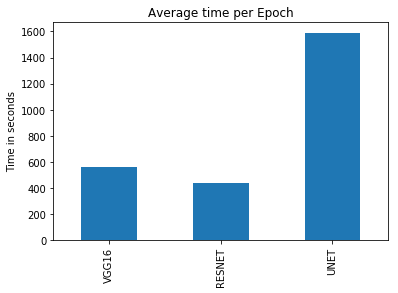

In [116]:
pd.DataFrame.from_dict(times).mean(axis=0).plot.bar()
plt.title('Average time per Epoch')
plt.ylabel('Time in seconds')

We can see that UNET takes by far the longes to train, while VGG 16 and RESNET are about the same. ResNet takes the smallest amount of time to train

## Test Metrics for ResNet :

### Acc, F1score, Precision, Recall, SP, FPR, Confusion Matrix

In [42]:
predict.keys()

dict_keys(['RESNET_1', 'VGG16_3'])

In [43]:
#Accuracy on Test Set not validation set
y_pred_prob = predict['RESNET_1']
y_pred = y_pred_prob>0.5
acc = accuracy_score(y_test>CATEG, y_pred)
f1score = f1_score(y_test>CATEG, y_pred, average='binary')
prec, recall, sp, fpr = get_confusion_meassures(y_test>CATEG,y_pred)

print("ResNet 50 Results:\n")
print("Accuracy: ", round(acc*100,2),"%")
print("F1 Score: ", f1score)
print("Precision: ",round(prec*100,2),"%") #Positive Predictive Value
print("Recall: ",round(recall*100,2),"%") #Sensitivity, True Positive Rate
print("Specificity: ",round(sp*100,2),"%") #True Negative Rate
print("False Positive Rate: ",round(fpr*100,2),"%") #
print("\nConfusion Matrix:\n ",confusion_matrix(y_test>CATEG, y_pred))

ResNet 50 Results:

Accuracy:  93.97 %
F1 Score:  0.22704507512520866
Precision:  34.52 %
Recall:  16.92 %
Specificity:  98.23 %
False Positive Rate:  1.77 %

Confusion Matrix:
  [[14302   258]
 [  668   136]]


## classification report and ROC curve

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, (y_test !=0)))

              precision    recall  f1-score   support

       False       0.99      0.88      0.93     14970
        True       0.12      0.59      0.20       394

   micro avg       0.87      0.87      0.87     15364
   macro avg       0.55      0.74      0.56     15364
weighted avg       0.97      0.87      0.91     15364



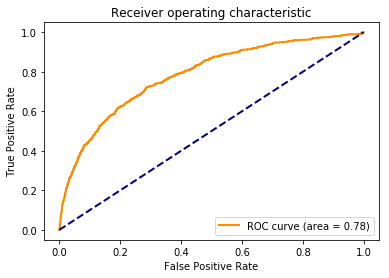

In [46]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,_ = roc_curve(y_test >CATEG,y_pred_prob )
auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Test Metrics for VGG:

### Acc, F1score, Precision, Recall, SP, FPR, Confusion Matrix

In [50]:
#Accuracy on Test Set not validation set
y_pred_prob = predict['VGG16_3']
y_pred = y_pred_prob>0.5
acc = accuracy_score(y_test>CATEG, y_pred)
f1score = f1_score(y_test>CATEG, y_pred, average='binary')
prec, recall, sp, fpr = get_confusion_meassures(y_test>CATEG,y_pred)

print("ResNet 50 Results:\n")
print("Accuracy: ", round(acc*100,2),"%")
print("F1 Score: ", f1score)
print("Precision: ",round(prec*100,2),"%") #Positive Predictive Value
print("Recall: ",round(recall*100,2),"%") #Sensitivity, True Positive Rate
print("Specificity: ",round(sp*100,2),"%") #True Negative Rate
print("False Positive Rate: ",round(fpr*100,2),"%") #
print("\nConfusion Matrix:\n ",confusion_matrix(y_test>CATEG, y_pred))

ResNet 50 Results:

Accuracy:  89.91 %
F1 Score:  0.28373382624768945
Precision:  22.57 %
Recall:  38.18 %
Specificity:  92.77 %
False Positive Rate:  7.23 %

Confusion Matrix:
  [[13507  1053]
 [  497   307]]


In [51]:
print(classification_report(y_pred, (y_test !=0)))

              precision    recall  f1-score   support

       False       0.94      0.90      0.92     14004
        True       0.31      0.46      0.37      1360

   micro avg       0.86      0.86      0.86     15364
   macro avg       0.63      0.68      0.65     15364
weighted avg       0.89      0.86      0.87     15364



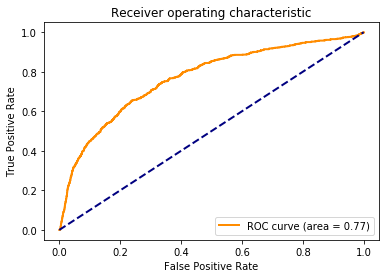

In [52]:
from sklearn.metrics import roc_curve, auc


fpr,tpr,_ = roc_curve(y_test >CATEG,y_pred_prob )
auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# U-NET : Build Model and Train 

In [20]:
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

import keras_metrics as km

dim = 128 #256
def unet(pretrained_weights = None,input_size = (dim,dim,1)):
    inputs_ = Input(input_size)
    
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs_)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)    
    merge6 = concatenate([conv4,up6], axis = 3)
    merge6 = BatchNormalization()(merge6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)   
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)   
    
    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)  
    merge7 = concatenate([conv3,up7], axis = 3)
    merge7 = BatchNormalization()(merge7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)  
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)  

    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)  
    merge8 = concatenate([conv2,up8], axis = 3)
    merge8 = BatchNormalization()(merge8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)  
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)  

    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)  
    merge9 = concatenate([conv1,up9], axis = 3)
    merge9 = BatchNormalization()(merge9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9) 
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9) 
    
    conv10 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'relu')(conv10) # normally unet stops right here and assigns each pixel 0 or 1 via sigmoid
    flattened = Flatten()(conv10)
    final = Dense(1, activation='sigmoid')(flattened)

    model = Model(inputs = inputs_, outputs = final)

    model.compile(optimizer = SGD(lr = 1e-6), loss = 'binary_crossentropy', metrics=['accuracy',km.f1_score()])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
model = unet()

## Store model / Load model

In [ ]:
store_keras_model(model, "unet")
#load_keras_model(model_name)

## Plot loss and accuracy

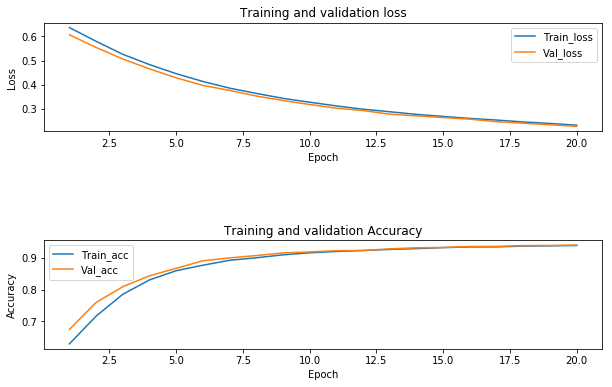

In [23]:
plot_training_history(model_history)

## Test Metrics : Acc, F1score, Precision, Recall, SP, FPR, Confusion Matrix

In [26]:
#Accuracy on Test Set not validation set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob>0.5
acc = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='binary')
prec, recall, sp, fpr = get_confusion_meassures(y_test,y_pred)

print("UNet Results:\n")
print("Accuracy: ", round(acc*100,2),"%")
print("F1 Score: ", f1score)
print("Precision: ",round(prec*100,2),"%") #Positive Predictive Value
print("Recall: ",round(recall*100,2),"%") #Sensitivity, True Positive Rate
print("Specificity: ",round(sp*100,2),"%") #True Negative Rate
print("False Positive Rate: ",round(fpr*100,2),"%") #
print("\nConfusion Matrix: ",confusion_matrix(y_test, y_pred))

UNet Results:

Accuracy:  86.31 %
F1 Score:  0.13129644921552436
Precision:  38.04 %
Recall:  7.93 %
Specificity:  98.06 %
False Positive Rate:  1.94 %

Confusion Matrix:  [[13101   259]
 [ 1845   159]]


# classification report and ROC curve

In [35]:
print(classification_report((y_test !=0), y_pred))
accuracy_score((y_test !=0), y_pred)

              precision    recall  f1-score   support

       False       0.88      0.98      0.93     13360
        True       0.38      0.08      0.13      2004

   micro avg       0.86      0.86      0.86     15364
   macro avg       0.63      0.53      0.53     15364
weighted avg       0.81      0.86      0.82     15364



0.8630564957042437

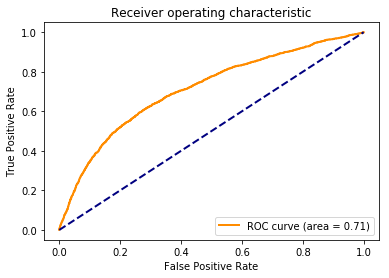

In [37]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,_ = roc_curve((y_test !=0),y_pred_prob )
auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Transfer Learning

In this notebook we assess the performance of the VGG16 architecture which has been pre-trained on the Imagenet dataset. We then freeze all of the model layers except the output layer and train only the final dense layer in order to get our final result.

It was found that transfer network did not perform particuarly well for this dataset and it was common for the network to overfit due to the small proportion of positive samples in our training set. The network did not converge when the convolutional layers or other dense layers of the VGG16 architecture were also trained.

The final result performed similarly to the some of the other procedures that were implemented during this study.

Convert VGG imagenet pre-trained weights for grayscale images.

2 methods:

**[1]** Convert your images to grayscale, copy the grayscale channel 2 times to make the image 3-D.

**[2]** Convert the weights of VGG16's first convolutional layer to accomodate gray-scale images. eg: Dimension of VGG16's block1_conv1 kernel: (3, 3, 3, 64) -> (height, width, in_channels, out_channels). By default, the in_channels correspond to the number of channels yout training images have. Since VGG16 is pre-trained on Imagenet that has RGB images, in_channels is 3. The idea is to extract these weight values, do a weighted-average of the filters (channel wise) and assign these values to block1_conv1_kernel, s.t. dimension becomes (3, 3, 1, 64).

### Load VGG model

In [83]:
model = VGG16(weights='imagenet', include_top=False)

# Block1_conv1 weights are of the format [3, 3, 3, 64] -> this is for RGB images
# For grayscale, format should be [3, 3, 1, 64]. Weighted average of the features has to be calculated across channels.
# RGB weights: Red 0.2989, Green 0.5870, Blue 0.1140

# getting weights of block1 conv1.
block1_conv1 = model.get_layer('block1_conv1').get_weights()
weights, biases = block1_conv1

# :weights shape = [3, 3, 3, 64] - (0, 1, 2, 3)
# convert :weights shape to = [64, 3, 3, 3] - (3, 2, 0, 1)
weights = np.transpose(weights, (3, 2, 0, 1))


kernel_out_channels, kernel_in_channels, kernel_rows, kernel_columns = weights.shape

# Dimensions : [kernel_out_channels, 1 (since grayscale), kernel_rows, kernel_columns]
grayscale_weights = np.zeros((kernel_out_channels, 1, kernel_rows, kernel_columns))

# iterate out_channels number of times
for i in range(kernel_out_channels):

    # get kernel for every out_channel
    get_kernel = weights[i, :, :, :]

    temp_kernel = np.zeros((3, 3))

    # :get_kernel shape = [3, 3, 3]
    # axis, dims = (0, in_channel), (1, row), (2, col)

    # calculate weighted average across channel axis
    in_channels, in_rows, in_columns = get_kernel.shape

    for in_row in range(in_rows):
        for in_col in range(in_columns):
            feature_red = get_kernel[0, in_row, in_col]
            feature_green = get_kernel[1, in_row, in_col]
            feature_blue = get_kernel[2, in_row, in_col]

            # weighted average for RGB filter
            total = (feature_red * 0.2989) + (feature_green * 0.5870) + (feature_blue * 0.1140)

            temp_kernel[in_row, in_col] = total


    # :temp_kernel is a 3x3 matrix [rows x columns]
    # add an axis at the end to specify in_channel as 1

    # 2 ways of doing this,

    # First: Add axis directly at the end of :temp_kernel to make its shape: [3, 3, 1], but this might be 
    # an issue when concatenating all feature maps

    # Second: Add axis at the start of :temp_kernel to make its shape: [1, 3, 3] which is [in_channel, rows, columns]
    temp_kernel = np.expand_dims(temp_kernel, axis=0)

    # Now, :temp_kernel shape is [1, 3, 3]

    # Concat :temp_kernel to :grayscale_weights along axis=0
    grayscale_weights[i, :, :, :] = temp_kernel

# Dimension of :grayscale_weights is [64, 1, 3, 3]
# In order to bring it to tensorflow or keras weight format, transpose :grayscale_weights

# dimension, axis of :grayscale_weights = (out_channels: 0), (in_channels: 1), (rows: 2), (columns: 3)
# tf format of weights = (rows: 0), (columns: 1), (in_channels: 2), (out_channels: 3)

# Go from (0, 1, 2, 3) to (2, 3, 1, 0)
grayscale_weights = np.transpose(grayscale_weights, (2, 3, 1, 0)) # (3, 3, 1, 64)

# combine :grayscale_weights and :biases
new_block1_conv1 = [grayscale_weights, biases]


# Reconstruct the layers of VGG16 but replace block1_conv1 weights with :grayscale_weights

# get weights of all the layers starting from 'block1_conv2'
vgg16_weights = {}
for layer in model.layers[2:]:
    if "conv" in layer.name:
        vgg16_weights["1024_" + layer.name] = model.get_layer(layer.name).get_weights()

del model


# Custom build VGG16
input = Input(shape=(128, 128, 1), name='128_input')
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1), data_format="channels_last", name='1024_block1_conv1')(input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='1024_block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='1024_block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='1024_block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='1024_block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='1024_block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='1024_block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block5_conv3')(x)
x = MaxPooling2D((8, 8), strides=(8, 8), name='1024_block5_pool')(x)

x = Flatten()(x)
x = Dense(2048, activation='relu', name='dense_1')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', name='dense_2')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid', name='dense_3')(x)

base_model = Model(inputs=input, outputs=x)

base_model.get_layer('1024_block1_conv1').set_weights(new_block1_conv1)
for layer in base_model.layers[2:]:
    if 'dense_3' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False
    if 'conv' in layer.name:
        layer.trainable = False
        base_model.get_layer(layer.name).set_weights(vgg16_weights[layer.name])
    if '1024_block5_conv3' in layer.name:
        layer.trainable = True
        base_model.get_layer(layer.name).set_weights(vgg16_weights[layer.name])
        
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
128_input (InputLayer)       (None, 128, 128, 1)       0         
_________________________________________________________________
1024_block1_conv1 (Conv2D)   (None, 128, 128, 64)      640       
_________________________________________________________________
1024_block1_conv2 (Conv2D)   (None, 128, 128, 64)      36928     
_________________________________________________________________
1024_block1_pool (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
1024_block2_conv1 (Conv2D)   (None, 64, 64, 128)       73856     
_________________________________________________________________
1024_block2_conv2 (Conv2D)   (None, 64, 64, 128)       147584    
_________________________________________________________________
1024_block2_pool (MaxPooling (None, 32, 32, 128)       0         
__________

In [79]:
y_train[y_train <= 2] = 0
y_val[y_val <= 2] = 0
y_test[y_test <= 2] = 0
y_train[y_train > 2] = 1
y_val[y_val > 2] = 1
y_test[y_test > 2] = 1

 93%|█████████▎| 55857/60000 [03:20<00:13, 318.43it/s]

In [80]:
class_weights = np.unique((y_train!=0),return_counts=True)[1]
class_weights = 1/(class_weights/class_weights.sum())
class_weights = class_weights / np.sum(class_weights)
print(class_weights)

[0.05861301 0.94138699]


### Train the model

In [ ]:
opt = SGD(lr=1e-6)

base_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',km.f1_score()])

with tf.device('/GPU:0'):
    model_history = base_model.fit(X_train, y_train, epochs = 20,
                            batch_size = 64, validation_data=(X_val, y_val),class_weight=class_weights)

Load saved training and test information for plotting:

In [107]:
loss_train = [0.7364,0.7378,0.7330,0.7312,0.7249,0.7282,0.7238,0.7214,0.7215,0.7161,0.7138,0.7130,0.7083,0.7036,0.7077,0.7043]
acc_train = [0.4797,0.4723,0.4838,0.486,0.4938,0.4906,0.5017,0.5030,0.5013,0.5135,0.5147,0.5167,0.5255,0.5253,0.5259,0.5238]
f1_score_train = [0.1010,0.0973,0.0951,0.0989,0.1021,0.0965,0.0951,0.0972,0.0995,0.0889,0.0964,0.0970,0.1041,0.0971,0.0874,0.0921]
loss_test = [0.7134,0.7111,0.7089,0.7066,0.7044,0.7022,0.7000,0.6978,0.6957,0.6935,0.6914,0.6892,0.6871,0.685,0.6829,0.6808]
acc_test = [0.0813,0.0963,0.0963,0.1126,0.1529,0.2043,0.2583,0.3195,0.3897,0.4704,0.5478,0.6402,0.7319,0.7918,0.8399,0.8718]
f1_score_test = [0.1001,0.1006, 0.1010,0.1003,0.1045,0.1105,0.1163,0.124,0.1331,0.1485,0.1535,0.1634,0.1858,0.196,0.2166,0.2213]

In [100]:
import seaborn as sns

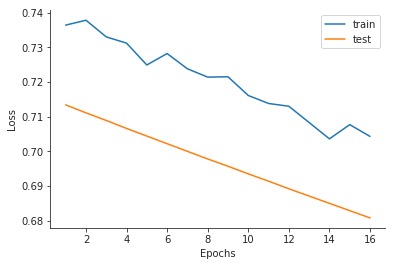

In [103]:
plt.figure()
plt.plot(np.arange(1,17),loss_train, label='train')
plt.plot(np.arange(1,17), loss_test, label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
sns.despine()

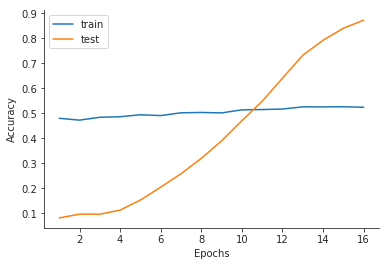

In [109]:
plt.figure()
plt.plot(np.arange(1,17),acc_train, label='train')
plt.plot(np.arange(1,17), acc_test, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
sns.despine()

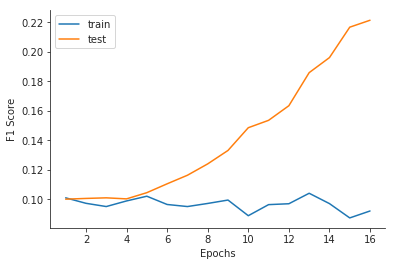

In [110]:
plt.figure()
plt.plot(np.arange(1,17),f1_score_train, label='train')
plt.plot(np.arange(1,17), f1_score_test, label='test')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
sns.despine()

In [25]:
store_keras_model(base_model, "VGG16_TransferLearning_40Epochs_1E-6LR_SGD_OutputOnly_BinaryCancer")

Saved model to disk


In [86]:
base_model.load_weights('VGG16_TransferLearning_40Epochs_1E-6LR_SGD_OutputOnly_BinaryCancer.h5')

In [89]:
y_pred_prob = base_model.predict(X_val)
y_pred = y_pred_prob > 0.5
acc = accuracy_score(y_val, y_pred)
print("VGG16 accuracy on test set: ", acc*100,"%")

VGG16 accuracy on test set:  92.96833064949007 %


In [90]:
print("Confusion Matrix:\n",confusion_matrix(y_val, y_pred))

Confusion Matrix:
 [[5171   91]
 [ 302   25]]


In [92]:
prec, recall, sp, fpr = get_confusion_measures(y_val,y_pred)
print("Precision: ",round(prec*100,2),"%") #Positive Predictive Value
print("Recall: ",round(recall*100,2),"%") #Sensitivity, True Positive Rate
print("Specificity: ",round(sp*100,2),"%") #True Negative Rate
print("False Positive Rate: ",round(fpr*100,2),"%") #

Precision:  21.55 %
Recall:  7.65 %
Specificity:  98.27 %
False Positive Rate:  1.73 %


# Image Annotation

The following code provides annotations for images that identifies areas of interest. 

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras import *
from keras.models import *
from keras.layers import *
import keras_metrics as km
from tqdm import tqdm
import pydicom

Using TensorFlow backend.


In [2]:
# Load model 
def load_keras_model(model_name):
    # Load json and create model
    json_file = open('./{}.json'.format(model_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # Load weights into new model
    model.load_weights("./{}.h5".format(model_name))
    return model

# produce and save plots
def box_plots(images, dim=128):
    # plots
    fig, ax = plt.subplots(1, len(images), figsize=(30,30))
    # iterate over images
    for i, image in enumerate(images):
        # plot image
        ax[i].imshow(image) 
        # limits
        ylim = int(np.floor(image.shape[0] / dim))
        xlim = int(np.floor(image.shape[1] / dim))
        # standardize image
        image = image / np.max(image)
        # iterate over subimages
        for x in tqdm(np.arange(xlim-1)):
            for y in np.arange(ylim-1):
                xl = int(x*dim)
                xr = int((x+1)*dim)
                yl = int(y*dim)
                yr = int((y+1)*dim)
                # predict and box if class 1
                subimage = image[yl:yr,xl:xr].reshape(1,dim,dim,1)
                out = model.predict(subimage)
                pred = (out >= .5) * 1
                if pred == 1:# and np.mean(subimage.flatten()) > .8:
                    print(out,np.mean(subimage.flatten()), y,x,yl,yr,xl,xr)
                    rect = patches.Rectangle((y*dim,x*dim),dim,dim,linewidth=1,edgecolor='r',facecolor='none')
                    ax[i].add_patch(rect)
    # format and save
    plt.tight_layout()
    plt.savefig('boxplots.png', bbox_inches='tight')

In [45]:
# load images
img1 = pydicom.dcmread('ddsm_images/image1.dcm').pixel_array
img2 = pydicom.dcmread('ddsm_images/image2.dcm').pixel_array
img3 = pydicom.dcmread('ddsm_images/image3.dcm').pixel_array
img4 = pydicom.dcmread('ddsm_images/image4.dcm').pixel_array

# image vector
images = [img1[500:3500,0:1800], img2[1500:4000,300:2400], img3[1000:4000,1000:2700], img4[1200:3700,900:2500]]

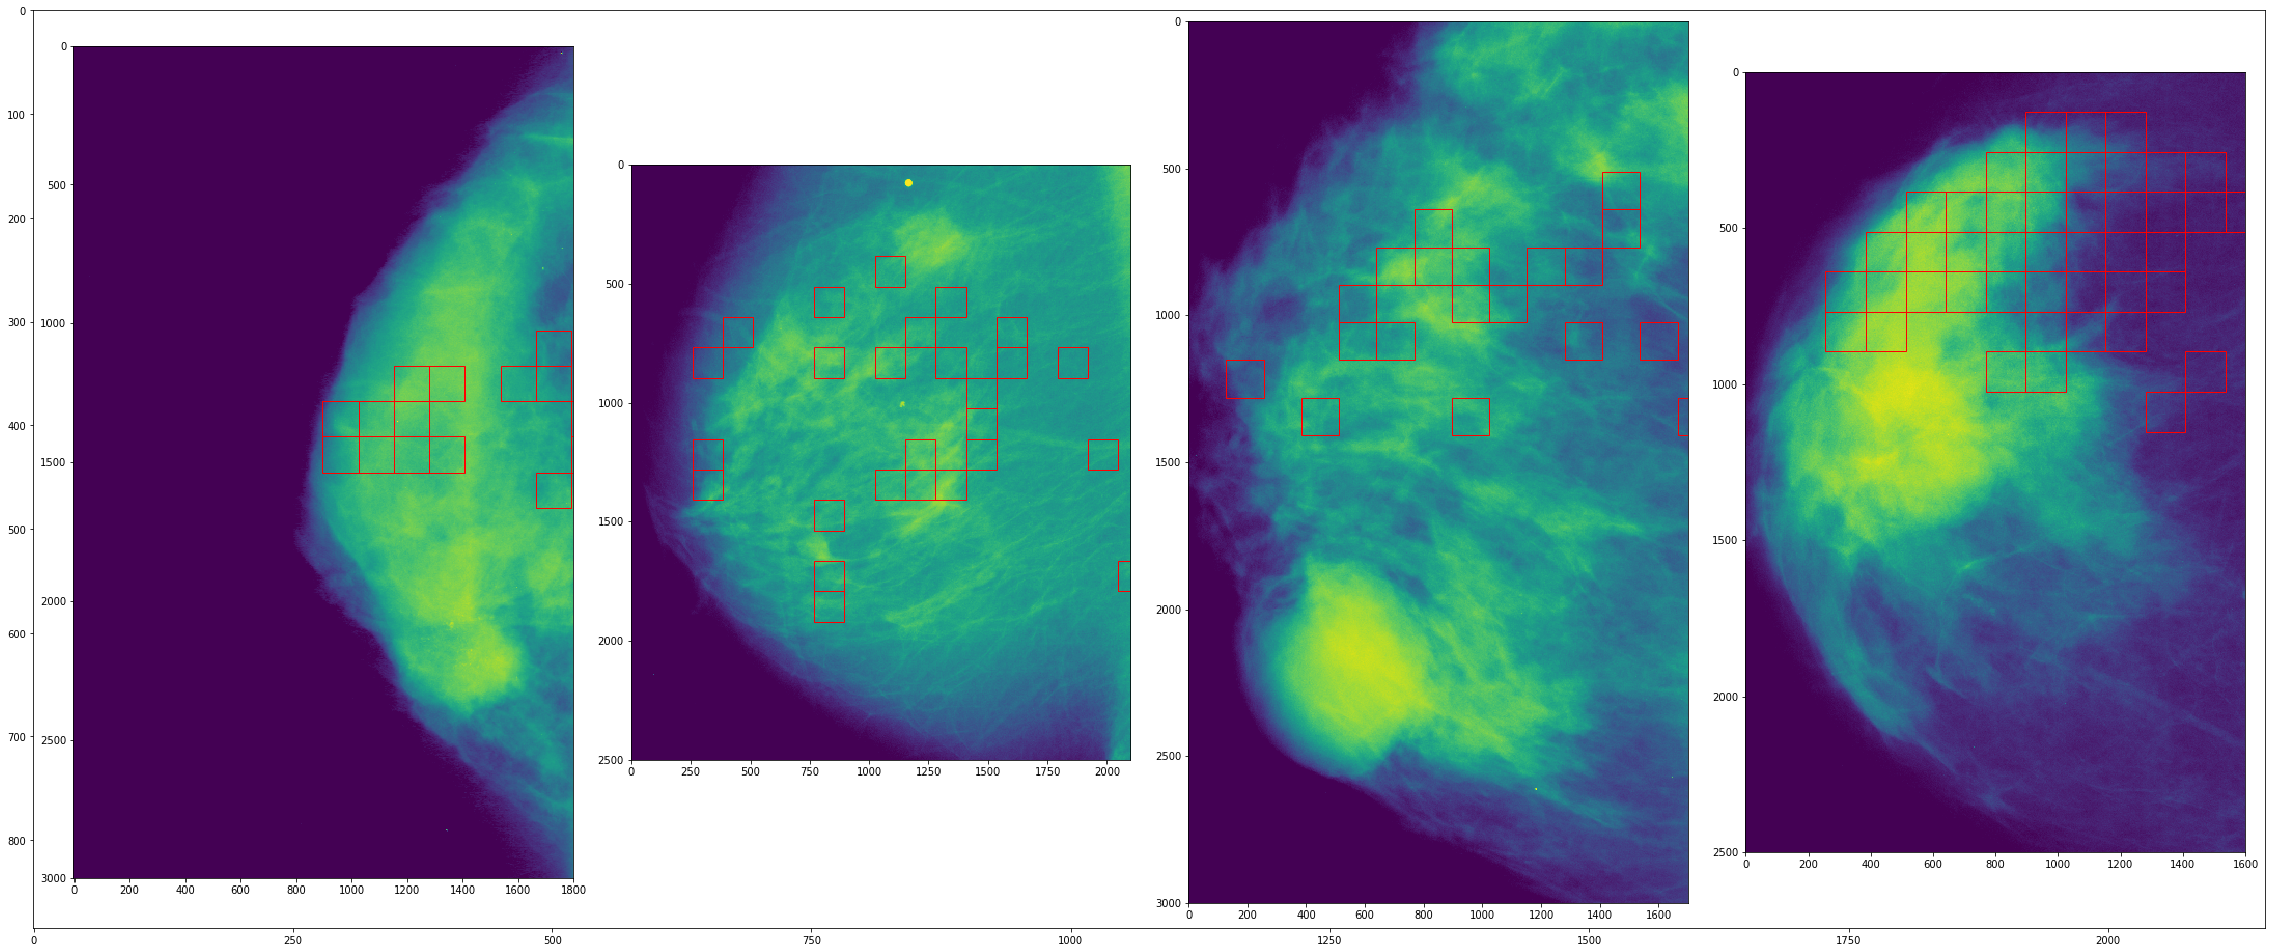

In [65]:
# # load model
# model = load_model('VGG16-epochs-20_batchsize-64_dim-128_categ-2_SGD-1e-06_decay_model.h5',
#                       custom_objects={'binary_f1_score':km.f1_score()})

# # create images
# box_plots(images)

# load image
from PIL import Image
img = Image.open('boxplots.png')  
plt.figure(figsize=(40,30))
plt.imshow(img)

# Results Summary

||                   | Accuracy | F1 Score | Precision | Recall  | Specificity | False Positive Rate |
|-------------------|----------|----------|-----------|---------|-------------|---------------------|
| VGG16             | 89.91 %  | 0.283    | 22.57 %   | 38.18 % | 92.77 %     | 7.23 %              |
| ResNet            | 93.97 %  | 0.227    | 34.52 %   | 16.92 % | 98.23 %     | 1.77 %              |
| U-Net             | 86.31    | 0.131    | 38.04 %   | 7.93 %  | 98.06 %     | 1.94 %              |
| Transfer Learning | 92.96%   | 0.033    | 21.55 %   | 7.65 %  | 98.27 %     | 1.73 %              |

# Discussion

#### Introduction
Humans possess an innate desire to understand the world around them. In many cases, this urge goes beyond what one might deem necessary or sufficient for survival or success in the modern world. Perhaps it is an evolutionary urge that has helped us achieve what we have today, but in many cases it seems separate from the fundamentally necessary parts of life. It may be for this reason that neural networks have been in equal measure both frustrating and amazing tools. On the one hand, neural networks are an extremely powerful class of models that clearly perform very well on problems we care a lot about. On the other hand, we often cannot fully understand how they work or why they produce certain results. Their status as a "black box" model has been a source of frustration both for those who use them in their work and for consumers who use neural network dependent products. Relevant to this project is the interpretability of neural networks and their role as a diagnostic tool for serious illness such as breast cancer. 

#### Why use a model?
When designing a model, one should consider who the user is and how they will use this model. For this project, the user is a oncologist or radiologist who is reviewing patient mammograms. The physician may have many competing goals, such as following medical laws or hospital practice, or remaining on schedule, but ultimately we hope that the physician's primary goal is to provide the best possible care to their patients. This means interpreting medical imaging as accurately as possible. Our models provide an alternative or compliment to the typical medical image evaluation (visual inspection by a radiologist/oncologist). Automating tumor detection via neural networks has the following benefits:

1. The model can be trained on a dataset much larger than a physician could ever visually review. 
2. It can view and incorporate new data quickly.
3. If a mistake is found in medical literature, these changes can be updated in the model without translating information to a large group of physicians.
4. Software is likely to be less expensive than employing a radiologist.
5. Consistent predictions/results
6. Extremely fast
7. Unbiased (data may be biased, which in turn biases the model, but the biases are likely to be less severe than in individual physicians)

However, neural networks for tumor detection do not have easily interpretable results. If a patient asks a physician "Why do you think I have cancer?," the response "Because the computer said so" is unlikely to be sufficient or reasonable. 

#### Interpretability matters

We propose the use of image annotation to improve model interpretability and public opinion of neural networks for cancer detection. This is a technique uses sub-image classification to identify important areas in an image and produces an annotated output with an intuitive interpretation. The technique is not specific to any particular neural network architecture, which makes it an appealing tool to use even if a specific model has not been selected (or the model is subject to change). We suggest that this annotation be used to provide additional information to physicians by alerting them to areas of interest in an image. We describe several scenarios in which image annotation could prove useful:

##### Scenario 1: 
A physician examines an image and identifies a particular mass as cancerous. The model also predicts cancer. Upon examining the annotated image, the physician sees that the mass she identified and the mass the model identified are the same. The physician is able to use the annotated image to explain why the model predicted cancer to their patient. The physician is also able to record that the model agreed with her interpretation of the image.

##### Scenario 2: 
A physician examines an image and identifies a particular mass as cancerous. The model does not predict cancer. The physician re-examines the image and determines that the mass was a benign calcification. The physician changes her diagnosis from cancer to benign. 

##### Scenario 3: 
A physician examines an image and does not observe anything cancerous. However, the model predicts cancer. The physician examines the annotated image and consults her colleague. Her colleague agrees with the model and suggests a biopsy, which confirms the presence of cancer. 

##### Scenario 4: 
A physician examines an image and identifies a particular mass as cancerous. The model also predicts cancer. However, when the annotated image is inspected, the area the physician identified is not highlighted, and a different part of the image is annotated. Without image annotation, the physician would likely use the model prediction ("cancer" or "positive") as confirmation her diagnosis. However, now that the annotated image is produced, she is less certain of her conclusion. The physician decides to perform further testing and contacts the hospital's technical team to discuss if the model may be misidentifying this particular type of tumor. 

There are many other scenarios in which image annotation may be helpful. Primarily it provides interpretability and a sanity check. It also provides physicians some information about cancer they may not otherwise have access to. 


# Conclusion
In conclusion, we were able to successfully provide some image annotation and improve recall. We set up a code base that can be used to import tfrecord, a common data format for large datasets, explore different models (as demonstrated here for VGG16, ResNet and UNet) and use pretrained models to perform transfer learning. Furthermore, we established code to train any of these models on tensorflow processing units, which offer a significant performance boost.

## References

[1] Ribli, D., Horváth, A., Unger, Z., Pollner, P. and Csabai, I. (2018). Detecting and classifying lesions in mammograms with Deep Learning. Scientific Reports, 8(1). https://www.nature.com/articles/s41598-018-22437-z.

[2] Agarwal, R., Diaz, O., Lladó, X., Yap, M. and Martí, R. (2019). Automatic mass detection in mammograms using deep convolutional neural networks. Journal of Medical Imaging, 6(03), p.1. https://doi.org/10.1117/1.JMI.6.3.031409.

[3] Wang, J., Nishikawa, R. and Yang, Y. (2017). Global detection approach for clustered microcalcifications in mammograms using a deep learning network. Journal of Medical Imaging, 4(2), p.024501. https://doi.org/10.1117/1.JMI.4.2.024501.

[4] Dhungel, N., Carneiro, G., Bradley, A. Automated Mass Detection from Mammograms using Deep Learning and Random Forest. Accessed on April 26th 2019 at https://cs.adelaide.edu.au/~carneiro/publications/mass_detection_BIA.pdf.

[5] Hamidinekoo, A., Denton, E., Rampun, A., Honnor, K. and Zwiggelaar, R. (2018). Deep learning in mammography and breast histology, an overview and future trends. Medical Image Analysis, 47, pp.45-67. https://doi.org/10.1016/j.media.2018.03.006.

[6] Dhungel, N., Carneiro, G. and Bradley, A. (2017). A deep learning approach for the analysis of masses in mammograms with minimal user intervention. Medical Image Analysis, 37, pp.114-128. https://doi.org/10.1016/j.media.2017.01.009.

[7] Wang, J. and Yang, Y. (2018). A context-sensitive deep learning approach for microcalcification detection in mammograms. Pattern Recognition, 78, pp.12-22. https://doi.org/10.1016/j.patcog.2018.01.009.

[8] Cai, H., Huang, Q., Rong, W., Song, Y., Li, J., Wang, J., Chen, J. and Li, L. (2019). Breast Microcalcification Diagnosis Using Deep Convolutional Neural Network from Digital Mammograms. Computational and Mathematical Methods in Medicine, 2019, pp.1-10. https://doi.org/10.1155/2019/2717454.

[9] Guan, S. (2019). Breast cancer detection using synthetic mammograms from generative adversarial networks in convolutional neural networks. Journal of Medical Imaging, 6(03), p.1. https://doi.org/10.1117/12.2318100.

[10] Hu, K., Yang, W. and Gao, X. (2017). Microcalcification diagnosis in digital mammography using extreme learning machine based on hidden Markov tree model of dual-tree complex wavelet transform. Expert Systems with Applications, 86, pp.135-144. https://doi.org/10.1016/j.eswa.2017.05.062.

[11]  Kaggle. (2019 April 26). DDSM Mammography.  Retrieved from https://www.kaggle.com/skooch/ddsm-mammography 

[12] The Digital Database for Screening Mammography, Michael Heath, Kevin Bowyer, Daniel Kopans, Richard Moore and W. Philip Kegelmeyer, in Proceedings of the Fifth International Workshop on Digital Mammography, M.J. Yaffe, ed., 212-218, Medical Physics Publishing, 2001. ISBN 1-930524-00-5.

[13] Rebecca Sawyer Lee, Francisco Gimenez, Assaf Hoogi , Daniel Rubin (2016). Curated Breast Imaging Subset of DDSM. The Cancer Imaging Archive.

[14] http://sagebionetworks.org/press-releases/the-digital-mammography-dream-challenge/

[15] Gertych, Arkadiusz & Swiderska, Zaneta & Ma, Zhaoxuan & Ing, Nathan & Markiewicz, Tomasz & Cierniak, Szczepan & Salemi, Hootan & Guzman, Samuel & Walts, Ann & S. Knudsen, Beatrice. (2019). Convolutional neural networks can accurately distinguish four histologic growth patterns of lung adenocarcinoma in digital slides. Scientific Reports. 9. 1483. 10.1038/s41598-018-37638-9. 

[16] Yamashita, Rikiya & Nishio, Mizuho & Kinh Gian Do, Richard & Togashi, Kaori. Convolutional neural networks: an overview and application in radiology. Insights into Imaging (2018) 9:611–629 https://doi.org/10.1007/s13244-018-0639-9

[17] Center for Disease Control. Breast Cancer Statistics. https://www.cdc.gov/cancer/breast/statistics/index.htm

[18] U.S. Cancer Statistics Working Group. U.S. Cancer Statistics Data Visualizations Tool, based on November 2017 submission data (1999-2015): U.S. Department of Health and Human Services, Centers for Disease Control and Prevention and National Cancer Institute; www.cdc.gov/cancer/dataviz, June 2018.

[19] U.S. Breast Cancer Statistics. https://www.breastcancer.org/symptoms/understand_bc/statistics

[20] Mayo Clinic. Mammogram guidelines: What are they?. https://www.mayoclinic.org/tests-procedures/mammogram/expert-answers/mammogram-guidelines/faq-20057759

[21] Kaiming He, Xiangyu Zhang, Shaoqing Ren and Jian Sun. Deep Residual Learning for Image Recognition. (2015). CoRR. http://arxiv.org/abs/1512.03385 

[22] Karen Simonyan and Andrew Zisserman. Very Deep Convolutional Networks for Large-Scale Image Recognition. (2015). ICLR. https://arxiv.org/pdf/1409.1556.pdf

[23] Olaf Ronneberger, Philipp Fischer, and Thomas Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. (2015). Medical Image Computing & Computer Assisted Intervention. https://arxiv.org/abs/1505.04597

[24] Ciresan, D.C., Gambardella, L.M., Giusti, A., Schmidhuber, J.: Deep neural networks segment neuronal membranes in electron microscopy images. In: NIPS. pp.2852–2860 (2012)

[25] Andrej Karpathy. Transfer Learning. CS231n Convolutional Neural Networks for Visual Recognition. http://cs231n.github.io/transfer-learning/

[26] https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/keras_mnist_tpu.ipynb#scrollTo=TTwH_P-ZJ_xx

# Training Deep Neural Networks on Tensor Processing Units

TPUs were developed by google to bring more performance to tensorflow based dnns. Google has developed a system of ASIC board and super computers. It was develop out of the concern that google might have to double their datacenters to acomodate the growing speach recognition useage on Android phones. They developed an tensor processing units as internal technology to run deep neural networks faster in training and deployment.

It was first anounced at Google I/O 2016, the second version and third versions are released and now also available through google cloud. If you are training ResNet50 train to 75 - 76 % accuracy might have taken days which now takes 12.5 hours. On a full TPU pod this can be done in 12.5 minutes. 

One TPU unit is composed of 8 TPUs and runs at 420 teraflops. 

More info : https://cloud.google.com/blog/products/ai-machine-learning/what-makes-tpus-fine-tuned-for-deep-learning

![TPU1](https://cloud.google.com/images/products/tpu/try-the-demo.gif)


![TPU2](https://images.anandtech.com/doci/12429/dean-nips17-12.png)

In [102]:
tf.keras.backend.clear_session()
def axy_computation(a, x, y):
    return a * x + y

inputs = [
    3.0,
    tf.ones([3, 3], tf.float32),
    tf.ones([3, 3], tf.float32),
]

tpu_computation = tpu.rewrite(axy_computation, inputs)

tpu_grpc_url = TPUClusterResolver(zone='us-central1-a',
    tpu='cm-tpu1').get_master()

with tf.Session(tpu_grpc_url) as sess:
    sess.run(tpu.initialize_system())
    sess.run(tf.global_variables_initializer())
    output = sess.run(tpu_computation)
    print(output)
    sess.run(tpu.shutdown_system())

print('Done!')

[array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]], dtype=float32)]
Done!


In [103]:
import os
# This address identifies the TPU we’ll use when configuring TensorFlow.
TPU_WORKER = tpu_grpc_url
tf.logging.set_verbosity(tf.logging.INFO)

## Helper function to read tfrecords

In [104]:
def read_tfrecord(serialized_example):
    '''takes a serialized entry, parses it, 
    and decodes the image into a numpy array'''
    # adapted from https://www.kaggle.com/skooch/ddsm-mammography
    features = tf.parse_single_example(
      serialized_example,
      features={'label': tf.FixedLenFeature([], tf.int64),
                'image': tf.FixedLenFeature([], tf.string)})

    label = features['label']
    image = tf.decode_raw(features['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])
    
    return label,image

## Helper function to read in training data

In [105]:
def get_train_data(_tf_records_filenames,
                   train_size=0.9,
                   resize_shape=(128,128,1)):
    
    '''load data from tfrecords into numpy array
       INPUT: list of tfrecords filenames
       OUTOUT: split of the data in numpy arrays
    '''
    
    _dataset = tf.data.TFRecordDataset(_tf_records_filenames
                                      ).map(read_tfrecord)
    _iterator = _dataset.make_one_shot_iterator()
    _label_it,_image_it = _iterator.get_next()
    
    labels = []
    images = []
    with tf.Session() as sess:
        print('start')
        for i in tqdm(range(60000)):
            try:
                _lbl,_im = sess.run((_label_it,_image_it))
                # we now resize
                _im = resize(_im, resize_shape)
                _im = np.array(_im,dtype=np.float16)
                images.append(_im)
                labels.append(_lbl)
            except:
                print('no more records.')
                print('total read records ', i)
                break

    labels = np.stack(labels).reshape(-1,1)
    images = np.stack(images)
    
    X_train, X_val, y_train, y_val =  train_test_split(images,labels,
                                                       shuffle=True,
                                                       train_size=train_size,
                                                       stratify=labels)
    del images,labels
    return X_train, X_val, y_train, y_val

## Helper functions  to store and load model 

In [106]:
# Store model
def store_keras_model(model, model_name):
    model_json = model.to_json() # serialize model to JSON
    with open("./{}.json".format(model_name), "w") as json_file:
        json_file.write(model_json)
    model.save_weights("./{}.h5".format(model_name)) # serialize weights to HDF5
    print("Saved model to disk")
    
# Load model 
def load_keras_model(model_name):
    # Load json and create model
    json_file = open('./{}.json'.format(model_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # Load weights into new model
    model.load_weights("./{}.h5".format(model_name))
    return model

## Plot function for loss and accuracy of a model

In [107]:
# Plot history
def plot_training_history(history,f1=False):

    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['acc']
    val_acc= history['val_acc']

    epochs = range(1,len(loss)+1)
    
    if f1 == True:
        fix, ax = plt.subplots(3,1,figsize=(10,10))
    else:
        fix, ax = plt.subplots(2,1,figsize=(10,10))
        
    #plot loss
    ax[0].plot(epochs, loss, label='Train_loss')
    ax[0].plot(epochs, val_loss, label='Val_loss')
    ax[0].set_title('Training and validation loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    #plot acc
    ax[1].plot(epochs, acc, label='Train_acc')
    ax[1].plot(epochs, val_acc, label='Val_acc')
    ax[1].set_title('Training and validation accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    
    if f1 == True:
        f1 = history['f1_score']
        val_f1 = history['val_f1_score'] 
        #plot f1
        ax[2].plot(epochs, f1, label='Train_f1')
        ax[2].plot(epochs, val_f1, label='Val_f1')
        ax[2].set_title('Training and validation f1-score')
        ax[2].set_xlabel('Epoch')
        ax[2].set_ylabel('f1 score')
    
    ax[0].legend()
    ax[1].legend()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1) 
    plt.show()                       

## Function to resize a numpy array of images

In [108]:
def resize_array_of_images(data, target_dim):
    
    resize_arr = np.zeros((data.shape[0],target_dim,target_dim,1))

    for i in range(data.shape[0]):
        _im = data[i]
        _resized_im = resize(_im, (target_dim, target_dim,1),anti_aliasing=True)
        resize_arr[i] = np.array(_resized_im,dtype=np.float16())
    
    return resize_arr

## Metrics of the Confussion Matrix (Recall, Precision, Specificity and False Positive Rate)

In [109]:
#https://classeval.wordpress.com/introduction/basic-evaluation-measures/
def get_confusion_meassures(y_test,y_pred) :
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    #Precision (Positive predictive value)
    prec = tp/(tp+fp)
    
    #Sensitivity (Recall or True positive rate)
    recall = tp/(tp+fn)
    
    #Specificity (True negative rate)
    sp = tn/(tn+fp)
    
    #False positive rate
    fpr = fp/(tn+fp)

    return prec,recall, sp,fpr

### define VGG16 model

In [110]:
# Let's define a model inspired by VGG16, pretty sure one of the sources you guys posted did this.

def VGG16(input_shape = (256, 256,1), classes = 1, batch_size = 8,dropout=0.4) :
    
    #_in = Input(shape=input_shape)
    
    _in = tf.keras.Input(name='input', shape=input_shape, 
                         batch_size=batch_size, dtype=tf.float32)
    
    x = _in
    
    for nfilters in [64,128]:
        for _ in range(2):
            x = ZeroPadding2D((1,1))(x)
            x = Conv2D(nfilters, (3, 3),kernel_initializer='he_normal')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        x = MaxPooling2D()(x)

    for nfilters in [256,512,512]:
        for _ in range(3):
            x = ZeroPadding2D((1,1))(x)
            x = Conv2D(nfilters, (3, 3),kernel_initializer='he_normal')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        x = MaxPooling2D()(x)

    x = Flatten()(x)
    x = Dense(16,kernel_initializer='he_normal',
              use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    
    if classes == 1:
        _out = Dense(classes,activation ='sigmoid')(x)
    if classes > 1:
        _out = Dense(classes,activation = 'softmax')(x)
    
    model = Model([_in],[_out])
    return model

## Inspect data

In [92]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))

print ("X_val shape: " + str(X_val.shape))
print ("y_val shape: " + str(y_val.shape))

print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 50296
number of validation examples = 5589
number of test examples = 15364
X_train shape: (50296, 256, 256, 1)
y_train shape: (50296, 1)
X_val shape: (5589, 256, 256, 1)
y_val shape: (5589, 1)
X_test shape: (15364, 256, 256, 1)
y_test shape: (15364, 1)


 93%|█████████▎| 55880/60000 [05:00<00:21, 189.16it/s]

## set image size

In [111]:
im_size = 128
val = 2

## Load test data

In [115]:
def load_test_data(paths,im_size=256):
    #load data
    X_test= np.load(paths['X'])
    y_test = np.load(paths['y'])


    #resize images to 128, resize to 256 runs out of memory
    X_test = resize_array_of_images(X_test,im_size)

    # Normalize image vectors (do we need to standardize? instead)
    #X_test = np.array(X_test/255.,np.float16)


    #Convert labels to binary
    y_test = y_test.reshape(-1,1)
    return X_test,y_test

    
paths = {'X':"test_data/test_data.npy",'y':"test_data/test_labels.npy"}
X_test,y_test = load_test_data(paths,im_size)

(array([2229636., 1435089., 2026291., 3510303., 3449604., 2073977.,
        1100596.,  391803.,  157444.,    9257.]),
 array([0.     , 0.09924, 0.1985 , 0.2976 , 0.397  , 0.496  , 0.595  ,
        0.6943 , 0.794  , 0.893  , 0.992  ], dtype=float16),
 <a list of 10 Patch objects>)

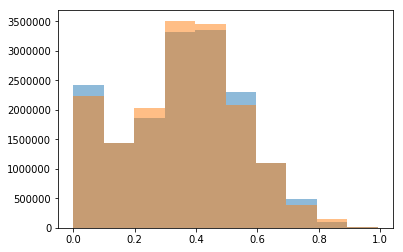

In [113]:
plt.hist(X_test[0:1000].flatten(),alpha=0.5)
plt.hist(X_train[0:1000].flatten(),alpha=0.5)

## Load train data

In [114]:
tf.keras.backend.clear_session()
tf_records_filenames = ["training_data/training10_0.tfrecords",
                        "training_data/training10_1.tfrecords",
                        "training_data/training10_2.tfrecords",
                        "training_data/training10_3.tfrecords",
                        "training_data/training10_4.tfrecords"]

X_train, X_val, y_train, y_val = get_train_data(tf_records_filenames,
                                                resize_shape = (im_size,im_size,1),
                                                train_size = 0.9)


  0%|          | 32/60000 [00:00<03:07, 319.99it/s]

start



 19%|█▉        | 11551/60000 [00:29<02:02, 396.14it/s]


 38%|███▊      | 22960/60000 [00:58<01:32, 400.41it/s]


 57%|█████▋    | 33919/60000 [01:27<01:07, 385.84it/s]


 76%|███████▌  | 45353/60000 [01:56<00:37, 390.41it/s]


 93%|█████████▎| 55849/60000 [02:22<00:10, 382.08it/s]

no more records.
total read records  55885


/home/muus/.conda/envs/tf_gpu/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)

 93%|█████████▎| 55849/60000 [02:40<00:10, 382.08it/s]

In [131]:
# balance classes in training data
# X_train = np.concatenate([X_train]+[X_train[(y_train>val).flatten()]]*5)
# y_train = np.concatenate([y_train]+[y_train[(y_train>val).flatten()]]*5)

In [20]:
print("Positive values in train: ", (sum(y_train>val)/len(y_train>val)*100)[0], ' %')
print("Positive values in validation: ", (sum(y_val>val)/len(y_val>val)*100)[0], ' %')
print("Positive values in test: ", (sum(y_test>val)/len(y_test>val)*100)[0], ' %')

Positive values in train:  5.861301097502784  %
Positive values in validation:  5.850778314546431  %
Positive values in test:  5.233012236396772  %


In [21]:
print(X_train.shape,y_train.shape)

(50296, 128, 128, 1) (50296, 1)


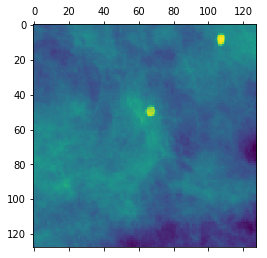

 93%|█████████▎| 55874/60000 [02:50<00:10, 379.00it/s]

In [22]:
import matplotlib.pyplot as plt
plt.matshow(np.array(X_train[0][:,:,0],dtype=np.float32))

In [40]:
class_weights = np.unique(y_train>val,return_counts=True)[1]
class_weights = 1/( class_weights / class_weights.sum())
print(class_weights)

[ 1.0622624  17.06105834]


We can either train the model with data generators or the usual fit method.
Because our dataset is small enough to fit in memory we will simply train on the 
numpy arrays. For larger datasets we would have to use tf.data.Dataset.

In [43]:
tf.keras.backend.clear_session()

batch_size = 128
limit  = -1

def train_input_fn(batch_size=batch_size):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((tf.cast(X_train[:limit],tf.float32),
                                                  tf.cast(y_train[:limit]>val,tf.float32)))

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.repeat() 
    dataset = dataset.batch(batch_size, drop_remainder=True)

    # Return the dataset.
    return dataset

In [138]:
def test_input_fn(batch_size=batch_size):
    
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((tf.cast(X_test,tf.float32),
                                                  tf.cast(y_test>val,tf.float32)))
    
    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, drop_remainder=True)
    
    # Return the dataset.
    return dataset

In [154]:
tf.keras.backend.clear_session()
model = VGG16(input_shape = (im_size, im_size,1), 
              classes = 1, 
              batch_size = batch_size, dropout=0.1) #works for multiples of powers of 2

EPOCHS = 50
lr = 1e-5
opt = SGD(lr=lr,momentum=0.9,decay=lr/EPOCHS)

model.compile(optimizer=opt,
          loss='binary_crossentropy',
          metrics=['accuracy'])

print('load tpu')
#We first connect to the TPU
tpu = tf.contrib.cluster_resolver.TPUClusterResolver(tpu = 'cm-tpu1' , zone='us-central1-a')
strategy = tf.contrib.tpu.TPUDistributionStrategy(tpu)

#Now we have to convert the model from cpu to tpu.
tpu_model = tf.contrib.tpu.keras_to_tpu_model(model, strategy=strategy)
print('done.')
print('start fit')
# tpu_model.fit(
#    train_input_fn,
#    steps_per_epoch = int(X_train.shape[0]/batch_size),
#    epochs=10,class_weight=class_weights)

# we trained for 50 epochs in an earlier run but still
# wanted to show the output, which is why we are training for
# just two epochs:

model_history = tpu_model.fit(X_train,y_train>val,
                                validation_data=[X_val,y_val>val],
                                batch_size=batch_size,
                                class_weight = class_weights,
                                epochs=2)

load tpu
done.
start fit
Train on 50296 samples, validate on 5589 samples
Epoch 1/2
50296/50296 [==============================] - 139s 3ms/sample - loss: 0.8474 - acc: 0.4088 - val_loss: 0.6355 - val_acc: 0.6506
Epoch 2/2
50296/50296 [==============================] - 27s 546us/sample - loss: 0.7474 - acc: 0.5222 - val_loss: 0.6974 - val_acc: 0.6567


The model trains extremely fast on TPUs. Because we requested a free trial, this is for free. In real world applications TPUs are reported to be 27 times faster in training while 28% cheaper. This makes them an attractive solution for large scale machine learning solutions.

Since the integration of TPUs with keras is still relatively new, we wanted to make sure functions like .save_weights and .load_weights still work:

In [86]:
tpu_model.save_weights('tpu_model.h5')

In [117]:
tpu_model.load_weights('tpu_model.h5')

Next, to be able to make predictions on the CPU or GPU, we have to conver the tpu model. Conceptually this is similar to what we had to do when we implemented the model that was trainable on tfrecords. Again, we will reinstansiate the model as CPU model and copy over the weights.

A limitation of the current implementation is that the test size has to be a multiple of the batch size.
We could change this by changing the input_size of the ServingInput layer to 1. 

In [126]:
from tensorflow.python.platform import tf_logging
class ServingInput(tf.keras.layers.Layer):
    # the important detail in this boilerplate code is "trainable=False"
    def __init__(self, name, dtype, batch_input_shape=None):
        super(ServingInput, self).__init__(trainable=False, name=name, dtype=dtype, batch_input_shape=batch_input_shape)
    def get_config(self):
        return {'batch_input_shape': self._batch_input_shape, 'dtype': self.dtype, 'name': self.name }

    def call(self, inputs):
        return inputs


tf_logging.set_verbosity(tf_logging.INFO)
restored_model = model
restored_model.load_weights('tpu_model_2.h5') # this copied the weights from TPU, does nothing on GPU
tf_logging.set_verbosity(tf_logging.WARN)

# add the serving input layer
serving_model = tf.keras.Sequential()
serving_model.add(ServingInput('serving', tf.float32, (batch_size,im_size,im_size,1)))
serving_model.add(restored_model)
#export_path = tf.contrib.saved_model.save_keras_model(serving_model, os.path.join(BUCKET, 'keras_export'))  # export he model to your bucket
#export_path = export_path.decode('utf-8')
#print("Model exported to: ", export_path)

In [88]:
model_name = 'tpu_model.h5'

serving_model.save('./trained_models/'+model_name)
pickle.dump(model_history.history,
            open('./trained_models/'+model_name,'wb'))

In [ ]:
# we slighly truncate the test data to comply with the
# batch size
yhat = tpu_model.predict(X_test[0:128*120],batch_size=128)

In [ ]:
# using the seving model we can now also predict on the GPU
with tf.device('/GPU:0'):
    yhat = serving_model.predict(X_test[0:128*120],batch_size=128)

## Plot loss and accuracy

In [129]:
model_name = 'tpu_model_10epochs.h5'
history = pickle.load(open('./final_models/'+model_name,'rb'))

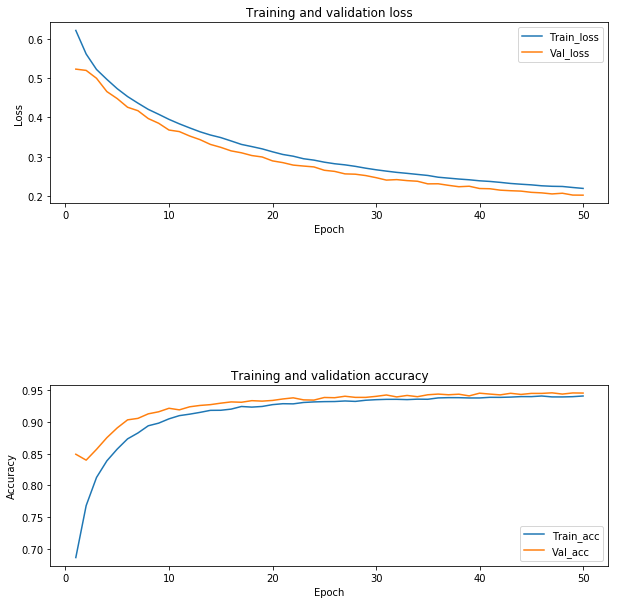

In [130]:
plot_training_history(history)

## Test Accuracy

In [133]:
y_pred_prob = tpu_model.predict(np.array(X_test,dtype=np.float32)[:128*100], verbose=1)
y_pred = y_pred_prob>0.5
acc = accuracy_score(y_test[:128*120]>val, y_pred)
print("VGG16 Acc on Test Set: ", acc*100,"%")

VGG16 Acc on Test Set:  94.73307291666667 %


## Confusion Matrix , Precision and Recall Meassures

In [135]:
print("Confusion Matrix:\n",confusion_matrix(y_test[:128*120]>val, y_pred))

Confusion Matrix:
 [[14367   189]
 [  620   184]]


In [137]:
prec, recall, sp, fpr = get_confusion_meassures(y_test[:128*120]>val,y_pred)
print("Precision: ",round(prec*100,2),"%") #Positive Predictive Value
print("Recall: ",round(recall*100,2),"%") #Sensitivity, True Positive Rate
print("Specificity: ",round(sp*100,2),"%") #True Negative Rate
print("False Positive Rate: ",round(fpr*100,2),"%") #

Precision:  49.33 %
Recall:  22.89 %
Specificity:  98.7 %
False Positive Rate:  1.3 %


In [151]:
print(classification_report(y_pred,y_test[:128*120]>2 ))
accuracy_score(y_test[:128*120]>2,y_pred)

              precision    recall  f1-score   support

       False       0.99      0.96      0.97     14987
        True       0.23      0.49      0.31       373

   micro avg       0.95      0.95      0.95     15360
   macro avg       0.61      0.73      0.64     15360
weighted avg       0.97      0.95      0.96     15360



0.9473307291666667

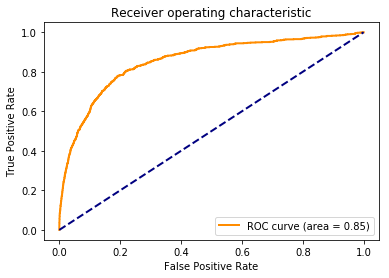

In [153]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,_ = roc_curve(y_test[0:128*120]>2,y_pred_prob )
auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()